In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

In [2]:
# Configuration des paramètres d'affichage
plt.style.use('default')  # style par défaut de matplotlib
sns.set_theme()  # Configuration du thème seaborn
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [3]:
# Lecture du dataset
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

# Analyse exploratoire

In [4]:
# Aperçu général des données
print("Shape:", df.shape)
display(df.head())

Shape: (3376, 46)


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [5]:
# Information sur les types de données et valeurs manquantes
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latit

Traduction                               
- 0   ID du bâtiment OSE
-  1   Année de données
-  2   Type de bâtiment
-  3   Type de propriété principale
-  4   Nom de la propriété
-  5   Adresse 
-  6   Ville
-  7   État   
-  8   Code postal
-  9   Numéro d'identification de la parcelle (Impôts)
-  10  CodeDistrictConseil
-  11  Quartier
-  12  Latitude
-  13  Longitude
-  14  Année de construction
-  15  Nombre de bâtiments
-  16  Nombre d'étages
-  17  Surface totale brute du batiment
-  18  Surface du parking
-  19  Surface du bâtiment hors parking
-  20  Liste de tous les types d'utilisation
-  21  Type d'utilisation principal
-  22  Surface dédiée à l'utilisation principale
-  23  Deuxième type d'utilisation
-  24  Surface du deuxième usage
-  25  Troisième type d'utilisation
-  26  Surface du troisième usage
-  27  Années de cCertification ENERGYSTAR
-  28  Score d'efficacité énergétique (1-100)
-  29  Intensité énergétique par pied carré (sur site)
-  30  Intensité énergétique normalisée selon la météo
-  31  Intensité énergétique à la source
-  32  Intensité énergétique à la source normalisée
-  33  Consommation énergétique totale sur site
-  34  Consommation énergétique normalisée
-  35  Consommation de vapeur ("système de chauffage urbain où la vapeur est produite de manière centralisée puis distribuée aux bâtiments via un réseau souterrain")
-  36  Électricité(kWh)
-  37  Électricité(kBtu)
-  38  Gaz naturel(therms)
-  39  Gaz naturel(kBtu)
-  40  Données par défaut 
-  41  Commentaires
-  42  Statut de conformité
-  43  Valeur aberrante
-  44  Émissions totales de gaz à effet de serre
-  45  Intensité émissions de gaz à effet de serre

OSE = Office of Sustainability & Environment
Bureau chargé de la durabilité et de l'environnement qui collecte les données

kBtu = kilo British thermal unit (unité d'énergie)
sf = square foot (pied carré)
kBtu/sf = mesure d'intensité énergétique par unité de surface
Cette unité permet de comparer l'efficacité énergétique entre bâtiments de tailles différentes

therms
Unité de mesure d'énergie utilisée principalement pour le gaz naturel
1 therm = 100,000 Btu

GHG (GreenHouse Gas)
GHG = Gaz à effet de serre
Mesuré en tonnes métriques de CO2 équivalent (MTCO2e)

In [6]:
# Statistiques descriptives
print("Statistiques descriptives:")
display(df.describe())

Statistiques descriptives:


OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

In [7]:
# Nombre de valeurs manquantes 
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [8]:
# Nombre de doublons
df.duplicated().sum()

0

### Suppression des batiments residentiels

In [9]:
# Affiche les types de bâtiments présents
print("Types de bâtiments dans le dataset :")
print(df['BuildingType'].value_counts())

Types de bâtiments dans le dataset :
BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64


In [10]:
# Filtre pour exclure les bâtiments résidentiels
non_residentiel_df = df[~df['BuildingType'].str.contains('Multifamily', case=False, na=False)]

print("\nNombre de bâtiments avant filtrage :", len(df))
print("Nombre de bâtiments après filtrage des non-résidentiels :", len(non_residentiel_df))


Nombre de bâtiments avant filtrage : 3376
Nombre de bâtiments après filtrage des non-résidentiels : 1668


In [11]:
print("\nTypes de propriétés primaires :")
print(non_residentiel_df['PrimaryPropertyType'].value_counts())


Types de propriétés primaires :
PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: count, dtype: int64


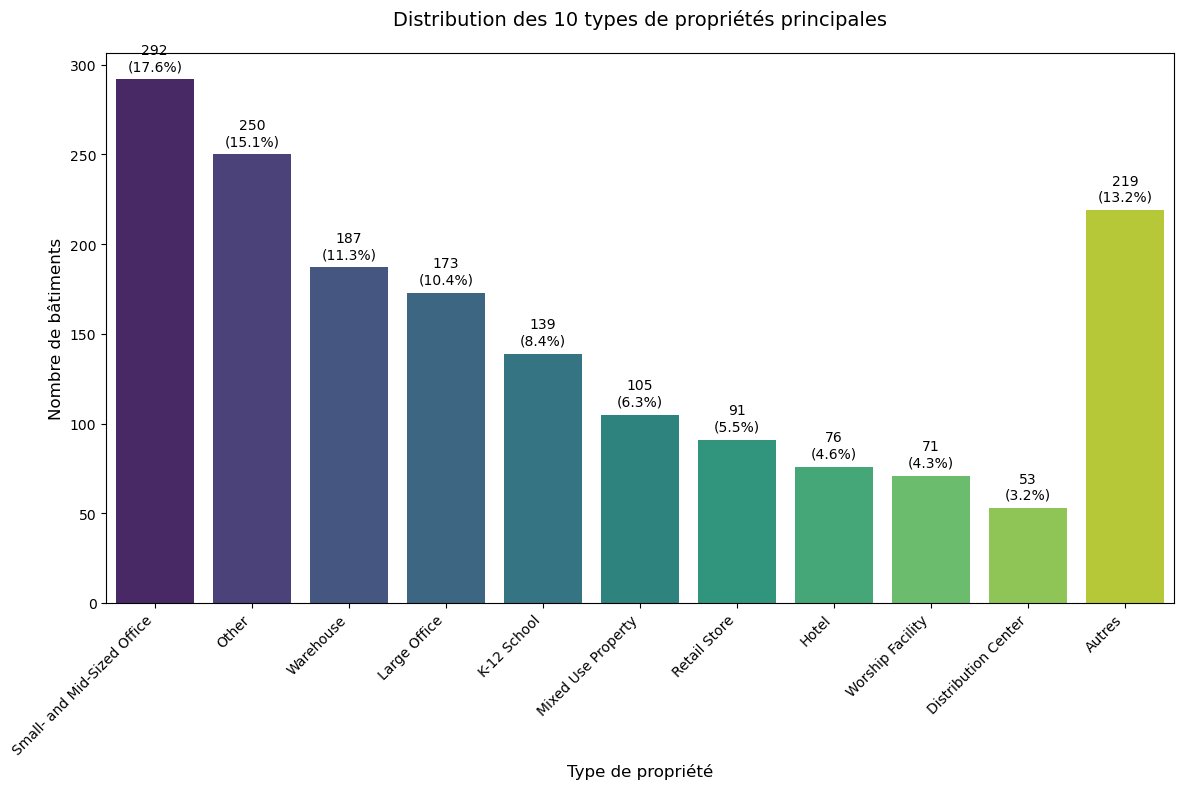

In [73]:
# Visualisation des types de propriétés principales
plt.figure(figsize=(12, 8))
top_types = non_residentiel_df['PrimaryPropertyType'].value_counts().head(10)
other_count = non_residentiel_df['PrimaryPropertyType'].value_counts().iloc[10:].sum()

# Ajouter la catégorie "Autres" pour regrouper les catégories moins fréquentes
plot_data = pd.concat([top_types, pd.Series({'Autres': other_count})])

# Calculer les pourcentages
plot_data_pct = 100 * plot_data / plot_data.sum()

# Créer le graphique avec les valeurs et pourcentages
ax = sns.barplot(x=plot_data.index, y=plot_data.values, hue=plot_data.index, palette='viridis', legend=False)
plt.title('Distribution des 10 types de propriétés principales', fontsize=14, pad=20)
plt.xlabel('Type de propriété', fontsize=12)
plt.ylabel('Nombre de bâtiments', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ajouter les valeurs et pourcentages sur les barres
for i, (count, pct) in enumerate(zip(plot_data, plot_data_pct)):
    ax.text(i, count + 5, f'{count}\n({pct:.1f}%)', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [13]:
# Détail pour Other
other_buildings = non_residentiel_df[non_residentiel_df['PrimaryPropertyType'] == 'Other']

# Répartition des types d'utilisation
print("\n2. Plus grand type d'utilisation:")
print(other_buildings['LargestPropertyUseType'].value_counts())

print("\n3. Deuxième plus grand type d'utilisation:")
print(other_buildings['SecondLargestPropertyUseType'].value_counts())


2. Plus grand type d'utilisation:
LargestPropertyUseType
Other                                                   88
Other - Recreation                                      26
Other - Entertainment/Public Assembly                   18
Parking                                                 16
Manufacturing/Industrial Plant                           8
Social/Meeting Hall                                      8
Repair Services (Vehicle, Shoe, Locksmith, etc)          6
Museum                                                   5
Automobile Dealership                                    5
Other - Lodging/Residential                              5
Other - Services                                         5
Strip Mall                                               5
Other - Mall                                             4
Other/Specialty Hospital                                 4
Financial Office                                         4
Library                                                  

In [14]:
# Détail pour Mixed Use Property
mixed_use = non_residentiel_df[non_residentiel_df['PrimaryPropertyType'] == 'Mixed Use Property']

# Répartition des types d'utilisation principaux
print("\n2. Plus grand type d'utilisation:")
print(mixed_use['LargestPropertyUseType'].value_counts())

print("\n3. Deuxième plus grand type d'utilisation:")
print(mixed_use['SecondLargestPropertyUseType'].value_counts())


2. Plus grand type d'utilisation:
LargestPropertyUseType
Office                                   31
Parking                                  14
Non-Refrigerated Warehouse               12
Other                                     9
Retail Store                              9
Multifamily Housing                       9
Other - Recreation                        5
Laboratory                                3
Other - Entertainment/Public Assembly     3
Restaurant                                2
Medical Office                            2
Supermarket/Grocery Store                 2
Fitness Center/Health Club/Gym            2
Other - Education                         2
Social/Meeting Hall                       2
Distribution Center                       1
Other - Restaurant/Bar                    1
Hotel                                     1
Strip Mall                                1
Residence Hall/Dormitory                  1
Bank Branch                               1
Name: count, dtype

In [15]:
# Exclut Multifamily Housing
non_residentiel_df = non_residentiel_df[(~non_residentiel_df['LargestPropertyUseType'].isin(['Multifamily Housing']))]

# Résultats
print("Nombre total de bâtiments après filtrage final:", len(non_residentiel_df))
print("\nDistribution des BuildingType dans notre sélection finale:")
print(non_residentiel_df['BuildingType'].value_counts())

Nombre total de bâtiments après filtrage final: 1656

Distribution des BuildingType dans notre sélection finale:
BuildingType
NonResidential        1449
SPS-District K-12       98
Nonresidential COS      85
Campus                  23
Nonresidential WA        1
Name: count, dtype: int64


## Nettoyage des données (valeurs manquantes, outliers)

In [16]:
# Analyse des valeurs manquantes
missing_values = non_residentiel_df.isnull().sum()
missing_percentages = (missing_values / len(non_residentiel_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print("Analyse des valeurs manquantes :")
display(missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False))

Analyse des valeurs manquantes :


Missing Values  Percentage
Comments                                   1656  100.000000
Outlier                                    1640   99.033816
YearsENERGYSTARCertified                   1558   94.082126
ThirdLargestPropertyUseTypeGFA             1312   79.227053
ThirdLargestPropertyUseType                1312   79.227053
SecondLargestPropertyUseType                812   49.033816
SecondLargestPropertyUseTypeGFA             812   49.033816
ENERGYSTARScore                             566   34.178744
ZipCode                                      16    0.966184
LargestPropertyUseTypeGFA                     6    0.362319
LargestPropertyUseType                        6    0.362319
SiteEUI(kBtu/sf)                              3    0.181159
SiteEUIWN(kBtu/sf)                            3    0.181159
SiteEnergyUseWN(kBtu)                         3    0.181159
Electricity(kBtu)                             2    0.120773
TotalGHGEmissions                             2    0.120773
NaturalGas(kBtu)                              2    0.120773
NaturalGas(therms)                            2    0.120773
SourceEUI(kBtu/sf)                            2    0.120773
Electricity(kWh)                              2    0.120773
SteamUse(kBtu)                                2    0.120773
SiteEnergyUse(kBtu)                           2    0.120773
SourceEUIWN(kBtu/sf)                          2    0.120773
NumberofBuildings                             2    0.120773
ListOfAllPropertyUseTypes                     2    0.120773
GHGEmissionsIntensity                         2    0.120773

3 groupes de données manquantes :
- Variables totalement manquantes (Comments : 100%)
- Variables très incomplètes (Outlier : 99%, YearsENERGYSTARCertified : 94%)
- Variables partiellement manquantes (SecondLargest/ThirdLargest PropertyUseType)

### Suppression des colonnes ou les données manquantes sont >70% 

In [17]:
columns_to_drop = ['Comments','ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified']
clean_df = non_residentiel_df.drop(columns=columns_to_drop)

### Colonne DefaultData

In [18]:
# Analyse des bâtiments avec données par défaut
print("Analyse des DefaultData:")
for var in ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']:
    print(f"\nStatistiques de {var} selon DefaultData:")
    print(clean_df.groupby('DefaultData')[var].describe())

Analyse des DefaultData:

Statistiques de TotalGHGEmissions selon DefaultData:
              count        mean         std  min      25%     50%      75%  \
DefaultData                                                                  
False        1566.0  191.700192  774.845091 -0.8  19.8125  49.540  147.105   
True           88.0   80.138750   79.842078  0.0  24.5775  55.055   90.470   

                  max  
DefaultData            
False        16870.98  
True           359.09  

Statistiques de SiteEnergyUse(kBtu) selon DefaultData:
              count          mean           std  min           25%  \
DefaultData                                                          
False        1566.0  8.774514e+06  3.115243e+07  0.0  1.209143e+06   
True           88.0  2.960782e+06  2.571226e+06  0.0  1.534597e+06   

                    50%          75%          max  
DefaultData                                        
False        2658437.75  7256966.125  873923712.0  
True         210217

Les bâtiments avec DefaultData = True (88 bâtiments, 5.3%) montrent :
- Des émissions GHG moyennes plus faibles (80.14 vs 190.82)
- Une dispersion des émissions plus faible (std: 79.84 vs 772.03)
- Une consommation énergétique moyenne plus faible (2.96M vs 8.74M kBtu)
- Des valeurs maximales beaucoup plus basses (359.09 vs 16870.98 pour GHG)

In [19]:
# Afficher le nombre de lignes avant la suppression
print(f"Nombre de lignes avant suppression : {len(clean_df)}")

# Supprimer les lignes où DefaultData est True
clean_df = clean_df[clean_df['DefaultData'] == False]

# Afficher le nombre de lignes après la suppression
print(f"Nombre de lignes après suppression : {len(clean_df)}")


Nombre de lignes avant suppression : 1656
Nombre de lignes après suppression : 1568


## Impact des features "Outlier" et "ComplianceStatus"

### Outliers

In [20]:
# Analyse du feature outliers
print("\nAnalyse du feature outliers :")
print(clean_df['Outlier'].value_counts(dropna=False))


Analyse du feature outliers :
Outlier
NaN             1554
Low outlier       12
High outlier       2
Name: count, dtype: int64


In [21]:
# Sélection des bâtiments outliers
outliers = clean_df[clean_df['Outlier'].notna()]

# Affichage détaillé des outliers
print("Détails des bâtiments outliers:")
print(outliers[['PropertyName', 'Outlier', 'PrimaryPropertyType', 
                'TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 
                'PropertyGFATotal', 'ENERGYSTARScore']].to_string())

Détails des bâtiments outliers:
                        PropertyName       Outlier          PrimaryPropertyType  TotalGHGEmissions  SiteEnergyUse(kBtu)  PropertyGFATotal  ENERGYSTARScore
226       Second And Spring Building  High outlier                 Large Office             362.66         4.139950e+07            172842              NaN
384                University Center   Low outlier                 Retail Store               2.22         3.189628e+05             69492            100.0
448           411 1ST AVE  S (ID608)   Low outlier                 Large Office              29.43         1.119592e+07            154159            100.0
517             401 Elliott Ave West  High outlier                 Large Office             189.18         2.713719e+07            129551              1.0
1229                 1518 Fifith Ave   Low outlier  Small- and Mid-Sized Office               0.17         2.410550e+04             57720              NaN
1295                  The Lusty Lady  

In [22]:
# Statistiques comparatives
print("\nStatistiques comparatives (outliers vs non-outliers):")
cols_to_compare = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 
                  'PropertyGFATotal', 'ENERGYSTARScore']

for col in cols_to_compare:
    print(f"\n{col}:")
    print("Outliers:")
    print(outliers[col].describe())
    print("\nNon-Outliers:")
    print(clean_df[clean_df['Outlier'].isna()][col].describe())


Statistiques comparatives (outliers vs non-outliers):

TotalGHGEmissions:
Outliers:
count     14.000000
mean      43.190714
std      104.581412
min        0.120000
25%        0.550000
50%        1.670000
75%        7.800000
max      362.660000
Name: TotalGHGEmissions, dtype: float64

Non-Outliers:
count     1552.000000
mean       193.039839
std        778.146325
min         -0.800000
25%         20.097500
50%         49.735000
75%        147.555000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

SiteEnergyUse(kBtu):
Outliers:
count    1.400000e+01
mean     5.826370e+06
std      1.271273e+07
min      1.680890e+04
25%      7.948822e+04
50%      1.829313e+05
75%      4.575492e+05
max      4.139950e+07
Name: SiteEnergyUse(kBtu), dtype: float64

Non-Outliers:
count    1.552000e+03
mean     8.801108e+06
std      3.126980e+07
min      0.000000e+00
25%      1.223105e+06
50%      2.687720e+06
75%      7.260363e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64



2 type de outliers : Low et high

TotalGHGEmissions
- Les outliers ont des émissions moyennes plus faibles (43.19 vs 186)
- Grande différence dans les médianes (3.51 vs 49.98)
- Les outliers montrent une dispersion moindre (std: 95 vs 755)

SiteEnergyUse
- Consommation moyenne plus faible pour les outliers (4.8M vs 8.5M kBtu)
- Grande différence dans les médianes (161K vs 2.5M kBtu)
- Les valeurs maximales sont très différentes (41M vs 873M kBtu)

PropertyGFATotal
- Les outliers sont généralement plus petits (moyenne: 57K vs 119K)
- Surface maximale beaucoup plus petite (173K vs 9.3M)
- Moins de variation dans les surfaces des outliers

ENERGYSTARScore
- Les outliers ont des scores remarquablement élevés (moyenne: 91 vs 65)
- La majorité des outliers ont un score parfait de 100
- Plus grande variance dans les scores des non-outliers

In [23]:
# Afficher le nombre de lignes avant la suppression
print(f"Nombre de lignes avant suppression : {len(clean_df)}")

# Supprimer les lignes où Outlier est 'Low outlier' ou 'High outlier'
clean_df = clean_df[~clean_df['Outlier'].isin(['Low outlier', 'High outlier'])]

# Afficher le nombre de lignes après la suppression
print(f"Nombre de lignes après suppression : {len(clean_df)}")

Nombre de lignes avant suppression : 1568
Nombre de lignes après suppression : 1554


### ComplianceStatus

In [24]:
# Distribution générale du ComplianceStatus
print("Distribution du ComplianceStatus:")
print(clean_df['ComplianceStatus'].value_counts(normalize=True))

# Analyse croisée avec les métriques clés
compliance_analysis = clean_df.groupby('ComplianceStatus').agg({
    'TotalGHGEmissions': ['count', 'mean', 'std'],
    'SiteEnergyUse(kBtu)': ['count', 'mean', 'std'],
    'ENERGYSTARScore': ['count', 'mean', 'std'],
    'DefaultData': 'sum'  # Nombre de données par défaut par statut
})

print("\nAnalyse détaillée par statut de conformité:")
print(compliance_analysis)

# Croisons ComplianceStatus avec DefaultData
print("\nCroisement ComplianceStatus et DefaultData:")
compliance_default = pd.crosstab(
    clean_df['ComplianceStatus'], 
    clean_df['DefaultData'],
    normalize='index'
)
print(compliance_default)

Distribution du ComplianceStatus:
ComplianceStatus
Compliant        0.989060
Missing Data     0.009009
Non-Compliant    0.001931
Name: proportion, dtype: float64

Analyse détaillée par statut de conformité:
                 TotalGHGEmissions                          \
                             count        mean         std   
ComplianceStatus                                             
Compliant                     1537  194.405335  781.765973   
Missing Data                    14   56.916429   92.138234   
Non-Compliant                    1    0.000000         NaN   

                 SiteEnergyUse(kBtu)                              \
                               count          mean           std   
ComplianceStatus                                                   
Compliant                       1537  8.887000e+06  3.140995e+07   
Missing Data                      14  0.000000e+00  0.000000e+00   
Non-Compliant                      1  0.000000e+00           NaN   

           

Distribution des statuts :
- 98.9% des bâtiments sont "Compliant"
- 5.3% ont des erreurs de données par défaut
- 0.9% sont "Non-Compliant"
- 0.19% ont des données manquantes

In [25]:
# Afficher le nombre de lignes avant la suppression
print(f"Nombre de lignes avant suppression : {len(clean_df)}")

# Supprimer les lignes où DefaultData est True
clean_df = clean_df[clean_df['ComplianceStatus'] == 'Compliant']

# Afficher le nombre de lignes après la suppression
print(f"Nombre de lignes après suppression : {len(clean_df)}")

Nombre de lignes avant suppression : 1554
Nombre de lignes après suppression : 1537


## Analyse des variables

### Variables cibles : TotalGHGEmissions et SiteEnergyUse(kBtu)

"vous voulez tenter de prédire les émissions de CO2 et la consommation totale d'énergie de bâtiments non destinés à l'habitation pour lesquels elles n'ont pas encore été mesurées."

Les deux variables cibles à prédire sont donc :
- Émissions de CO2 : TotalGHGEmissions
- Consommation totale d'énergie : SiteEnergyUse(kBtu)

Statistiques descriptives des variables cibles:
       TotalGHGEmissions  SiteEnergyUse(kBtu)
count        1537.000000         1.537000e+03
mean          194.405335         8.887000e+06
std           781.765973         3.140995e+07
min            -0.800000         5.713320e+04
25%            20.640000         1.252324e+06
50%            49.980000         2.735166e+06
75%           147.750000         7.305474e+06
max         16870.980000         8.739237e+08


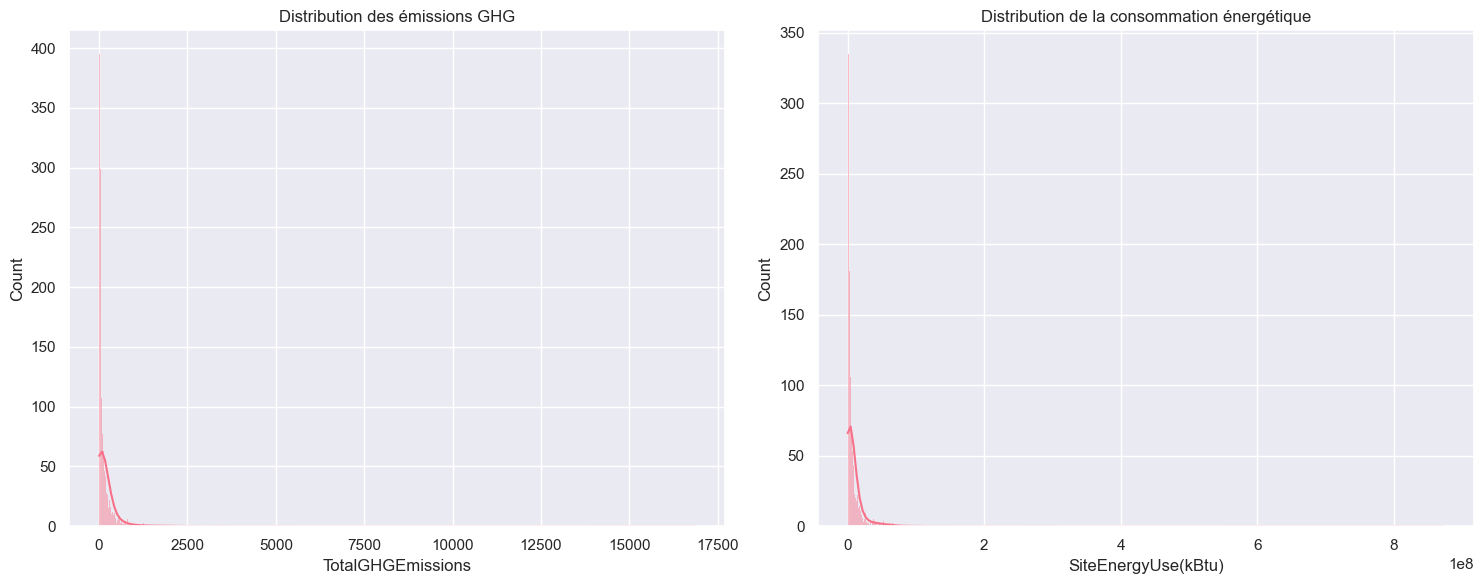

In [26]:
target_vars = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']

# Statistiques descriptives des variables cibles
print("Statistiques descriptives des variables cibles:")
print(clean_df[target_vars].describe())

# Visualisation de leur distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=clean_df, x='TotalGHGEmissions', kde=True)
plt.title('Distribution des émissions GHG')

plt.subplot(1, 2, 2)
sns.histplot(data=clean_df, x='SiteEnergyUse(kBtu)', kde=True)
plt.title('Distribution de la consommation énergétique')

plt.tight_layout()
plt.show()

TotalGHGEmissions (émissions totales de gaz à effet de serre) :
- Une valeur négative (-0.8) qui n'a pas de sens à priori
- Distribution très asymétrique : moyenne (193.6) beaucoup plus élevée que la médiane (49.8)
- Grande dispersion : écart-type (779.1) très élevé par rapport à la moyenne
- Valeurs extrêmes : max à 16870.98 très éloigné du 75e percentile (147.2)

SiteEnergyUse(kBtu) (consommation totale d'énergie) :
Problèmes identifiés :
- Distribution très asymétrique : moyenne (8.86e6) beaucoup plus élevée que la médiane (2.73e6)
- Grande dispersion : écart-type (3.13e7) très élevé par rapport à la moyenne
- Écart important entre min (5.71e4) et max (8.74e8)

In [27]:
# Analyse des valeurs négatives
print("Analyse des valeurs négatives dans TotalGHGEmissions:")
print("\nNombre de valeurs négatives:", sum(clean_df['TotalGHGEmissions'] < 0))
print("\nDétails des entrées avec valeurs négatives:")
negative_ghg = clean_df[clean_df['TotalGHGEmissions'] < 0]
print(negative_ghg[['PropertyName', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 'PrimaryPropertyType']])

# La valeur minimale positive
min_positive = clean_df[clean_df['TotalGHGEmissions'] > 0]['TotalGHGEmissions'].min()
print("\nValeur minimale positive des émissions:", min_positive)

Analyse des valeurs négatives dans TotalGHGEmissions:

Nombre de valeurs négatives: 1

Détails des entrées avec valeurs négatives:
        PropertyName  TotalGHGEmissions  SiteEnergyUse(kBtu)  \
3206  Bullitt Center               -0.8          342726.0938   

              PrimaryPropertyType  
3206  Small- and Mid-Sized Office  

Valeur minimale positive des émissions: 0.4


Après recherche sur internet, ce batiment est à energie positive: TotalGHGEmissions atypique mais à priori juste.

### Variables structurelles

"Votre prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)"

Variables caractèristiques
- BuildingType : Type de bâtiment (résidentiel, non résidentiel, etc)
- PrimaryPropertyType : Type de propriété principal (bureau, entrepôt, etc)
- NumberofBuildings : Nombre de bâtiments
- NumberofFloors : Nombre d'étages
- PropertyGFATotal : Surface brute totale des bâtiments
- PropertyGFAParking : Surface des parkings
- PropertyGFABuilding(s) : Surface des bâtiments hors parking
- ListOfAllPropertyUseTypes : Liste de tous les types d'utilisation
- LargestPropertyUseType : Type d'utilisation principal
- LargestPropertyUseTypeGFA : Surface dédiée à l'utilisation principale

Variables de consommation et d'intensité énergétique
- SiteEUI(kBtu/sf) : Intensité énergétique sur site par pied carré
- SiteEUIWN(kBtu/sf) : Intensité énergétique sur site normalisée par pied carré
- SourceEUI(kBtu/sf) : Intensité énergétique à la source par pied carré
- SourceEUIWN(kBtu/sf) : Intensité énergétique à la source normalisée par pied carré
- SiteEnergyUse(kBtu) : Consommation d'énergie totale sur site
- SiteEnergyUseWN(kBtu) : Consommation d'énergie sur site normalisée

Variables de consommation par type d'énergie
- SteamUse(kBtu) : Consommation de vapeur
- Electricity(kWh) : Consommation d'électricité en kWh
- Electricity(kBtu) : Consommation d'électricité en kBtu
- NaturalGas(therms) : Consommation de gaz naturel en therms
- NaturalGas(kBtu) : Consommation de gaz naturel en kBtu

Variables d'émissions de gaz à effet de serre
- TotalGHGEmissions : Émissions totales de GES
- GHGEmissionsIntensity : Intensité des émissions de GES

Variables de performance et conformité
- ENERGYSTARScore : Score de performance énergétique ENERGY STAR (1-100)
- ComplianceStatus : Statut de conformité

Variables de localisation
- Address : Adresse postale
- City : Ville
- State : État
- Latitude : Latitude
- Longitude : Longitude
- ZipCode : Code postal
- CouncilDistrictCode : Code de district
- Neighborhood : Quartier

Variables d'identification :
- OSEBuildingID : Identifiant du bâtiment
- PropertyName : Nom de la propriété
- TaxParcelIdentificationNumber : Numéro d'identification de la parcelle

Variable temporelles
- YearBuilt : Année de construction
- DataYear : Année des données

Variables atypiques
- Outlier : Indicateur de valeur aberrante

#### Variables numériques

In [28]:
print(clean_df.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')


In [29]:
# Fonction pour supprimer les variables redondantes ou non pertienentes du df
def clean_redundant_variables(df):
    # Liste des variables à supprimer
    columns_to_drop = ['PropertyName', 'DataYear', #non pertinent par nature pour trouver les valeurs cibles
                       'DefaultData','ComplianceStatus',#valeurs uniques
                       'BuildingType', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType','LargestPropertyUseType',
                       'Address', 'City', 'State', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', #"doublons" de Neighborhood, lattitude et longitude
                       'SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)',#les données normalisées sont retirées au profit des valeurs originales (modeles sans normalisation)
                       'Electricity(kWh)', 'NaturalGas(therms)', 
                       'Outlier'
    ]
    
    # Vérifie si les colonnes existent dans le DataFrame avant suppression
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]

    # Supprime les colonnes
    clean_df = df.drop(columns=columns_to_drop)
    
    # Affiche les colonnes conservées
    print("Variables conservées :")
    for col in clean_df.columns:
        print(f"- {col}")
    
    print(f"Nombre de variables après nettoyage : {len(clean_df.columns)}")
    
    return clean_df

# Utilisation
clean_df = clean_redundant_variables(clean_df)


Variables conservées :
- OSEBuildingID
- PrimaryPropertyType
- ZipCode
- Neighborhood
- Latitude
- Longitude
- YearBuilt
- NumberofBuildings
- NumberofFloors
- PropertyGFATotal
- PropertyGFAParking
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- SecondLargestPropertyUseType
- SecondLargestPropertyUseTypeGFA
- ENERGYSTARScore
- SiteEUI(kBtu/sf)
- SourceEUI(kBtu/sf)
- SiteEnergyUse(kBtu)
- SteamUse(kBtu)
- Electricity(kBtu)
- NaturalGas(kBtu)
- TotalGHGEmissions
- GHGEmissionsIntensity
Nombre de variables après nettoyage : 24


In [30]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1537 non-null   int64  
 1   PrimaryPropertyType              1537 non-null   object 
 2   ZipCode                          1524 non-null   float64
 3   Neighborhood                     1537 non-null   object 
 4   Latitude                         1537 non-null   float64
 5   Longitude                        1537 non-null   float64
 6   YearBuilt                        1537 non-null   int64  
 7   NumberofBuildings                1537 non-null   float64
 8   NumberofFloors                   1537 non-null   int64  
 9   PropertyGFATotal                 1537 non-null   int64  
 10  PropertyGFAParking               1537 non-null   int64  
 11  PropertyGFABuilding(s)           1537 non-null   int64  
 12  LargestPropertyUseTypeGFA

### ENERGYSTARScore


Analyse de NumberofBuildings:
count    1537.000000
mean        1.177619
std         3.048492
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64


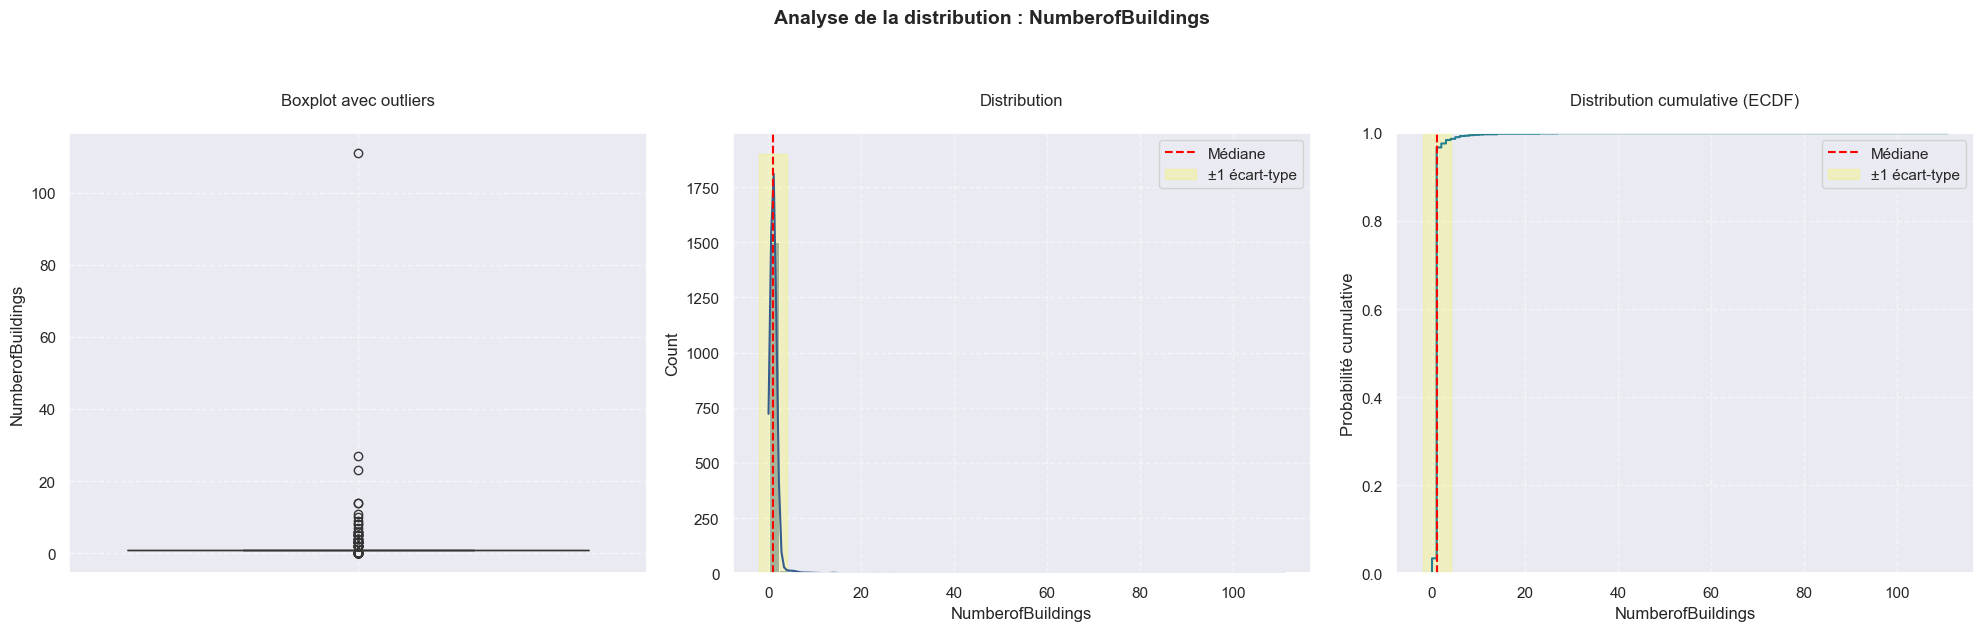


Analyse de NumberofFloors:
count    1537.000000
mean        4.256994
std         6.746406
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64


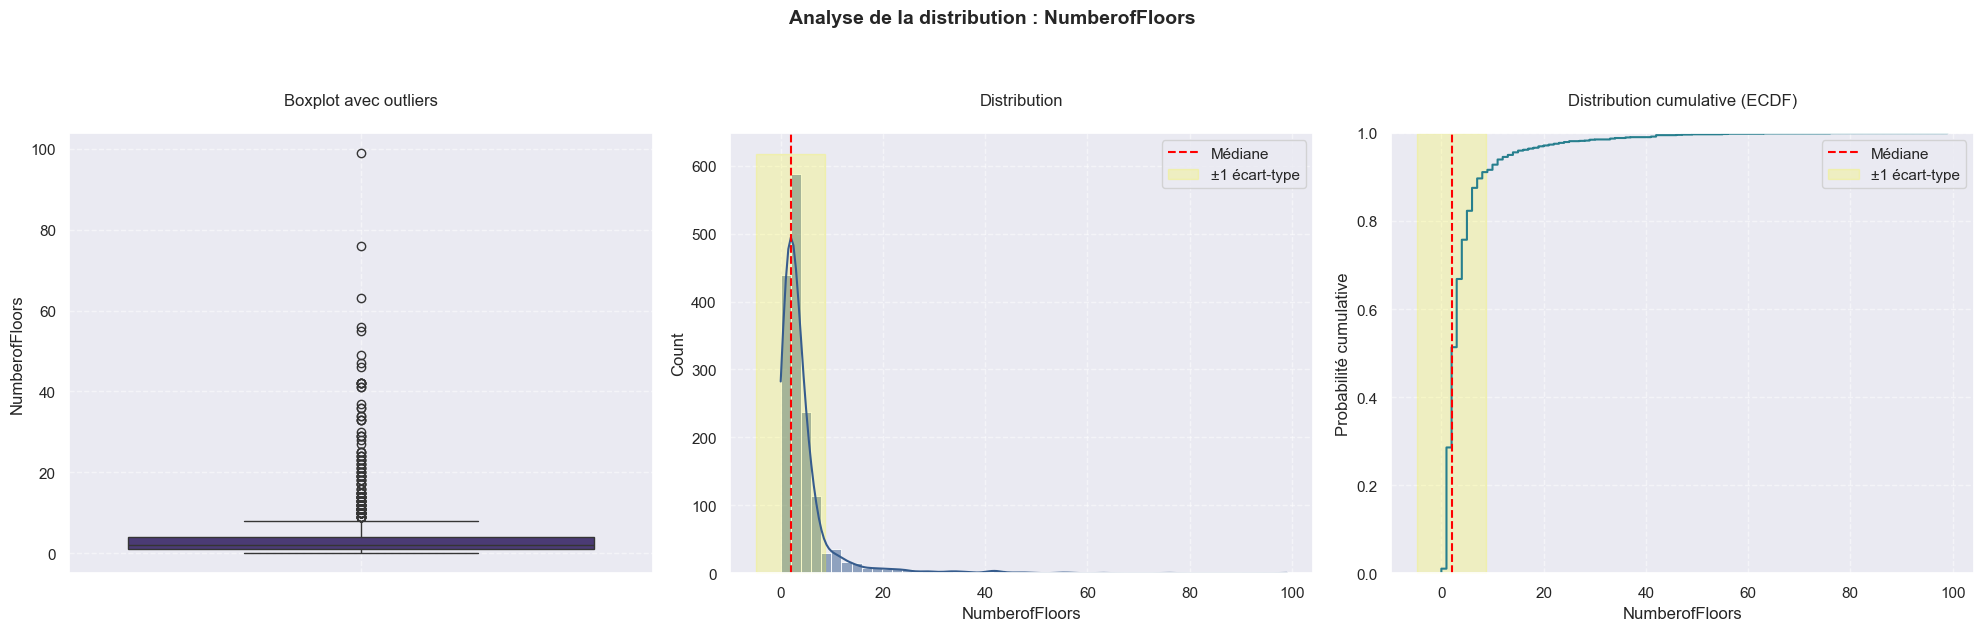


Analyse de PropertyGFATotal:
count    1.537000e+03
mean     1.211367e+05
std      3.063701e+05
min      1.128500e+04
25%      2.884100e+04
50%      4.817900e+04
75%      1.079300e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64


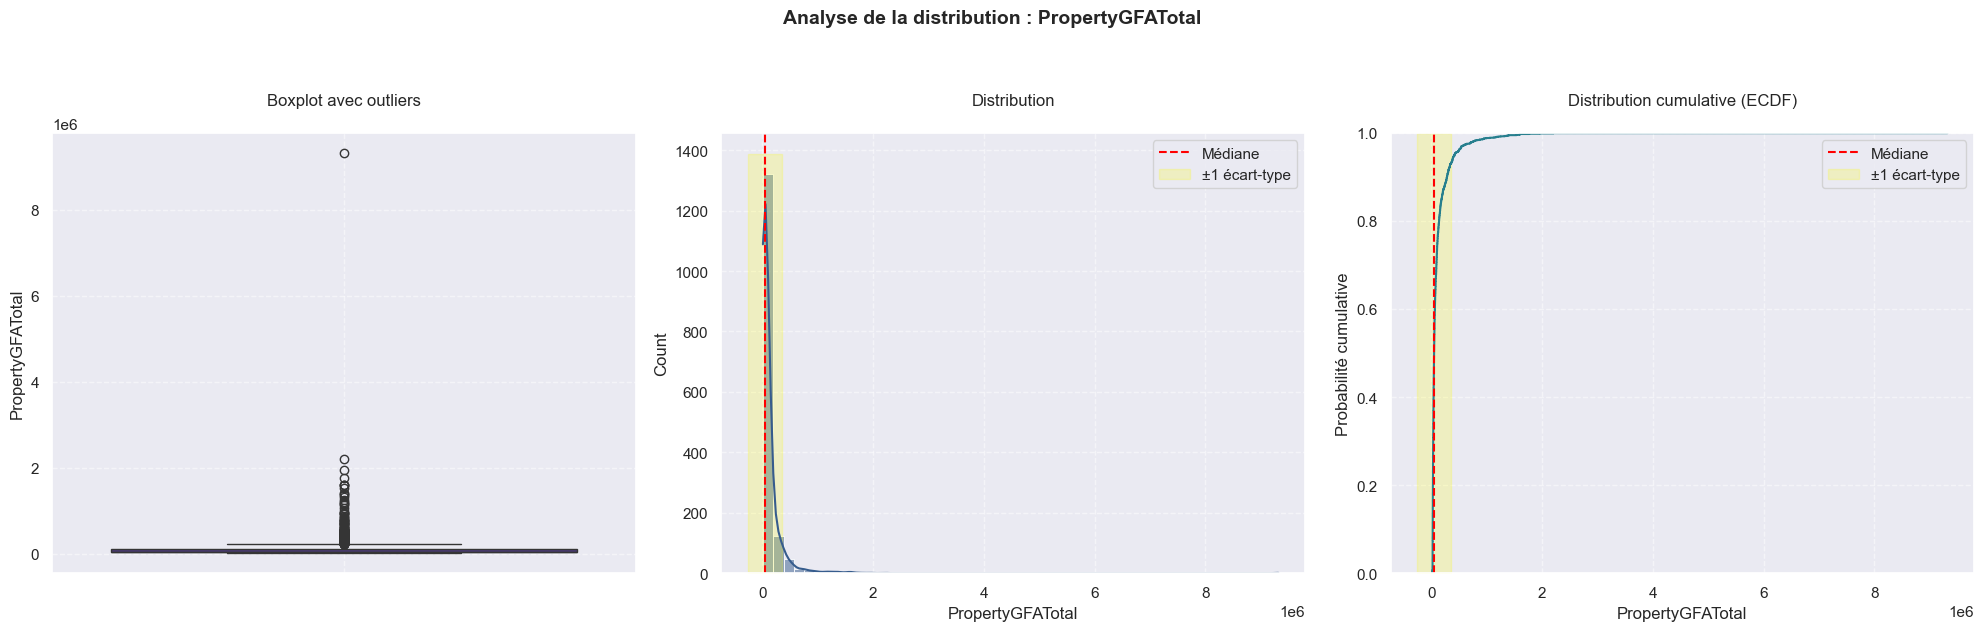


Analyse de PropertyGFAParking:
count      1537.000000
mean      13824.908913
std       43793.640872
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64


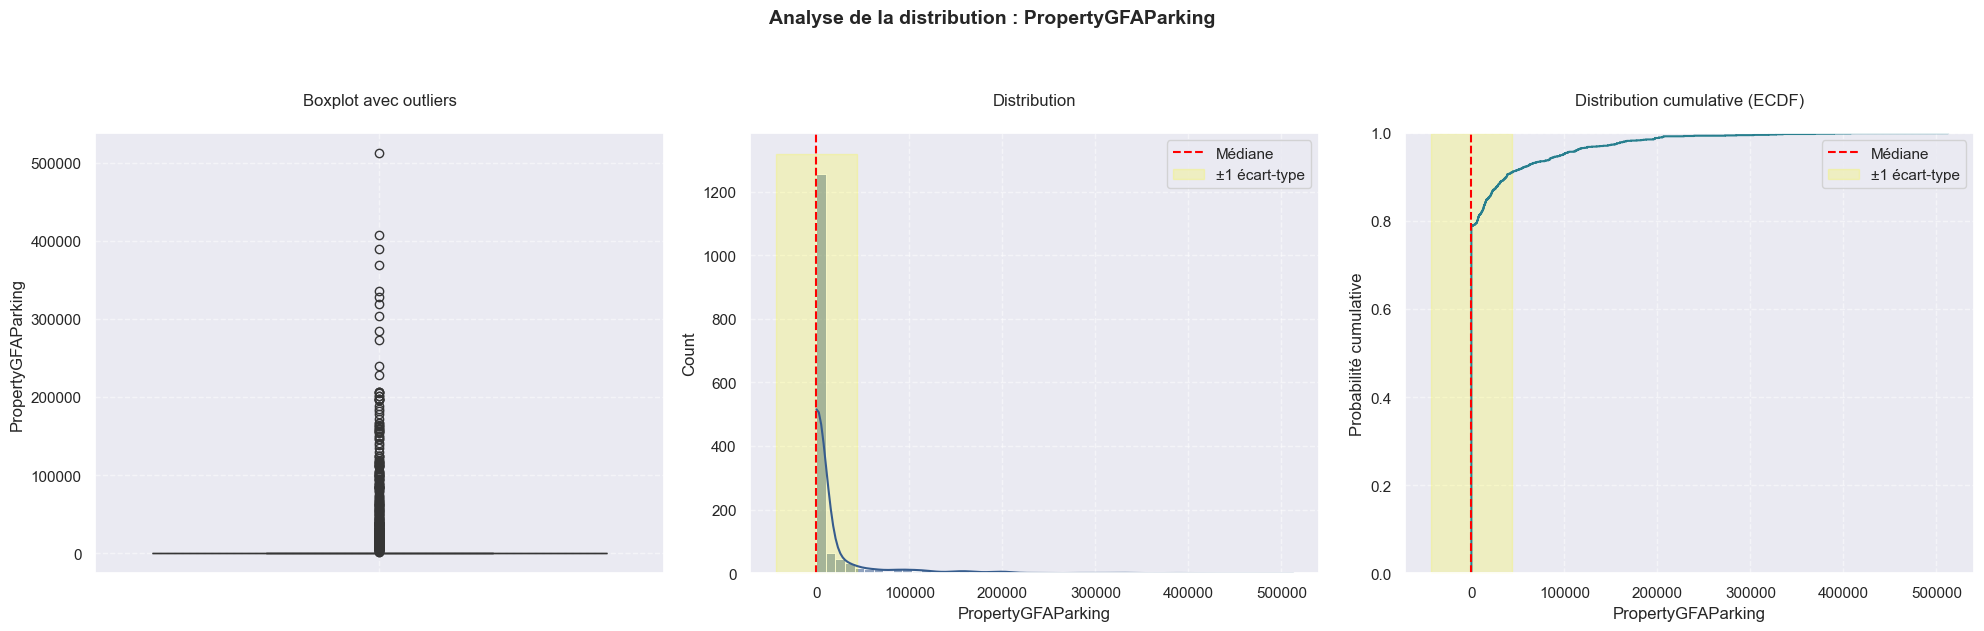


Analyse de PropertyGFABuilding(s):
count    1.537000e+03
mean     1.073118e+05
std      2.928146e+05
min      3.636000e+03
25%      2.793800e+04
50%      4.618300e+04
75%      9.542600e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64


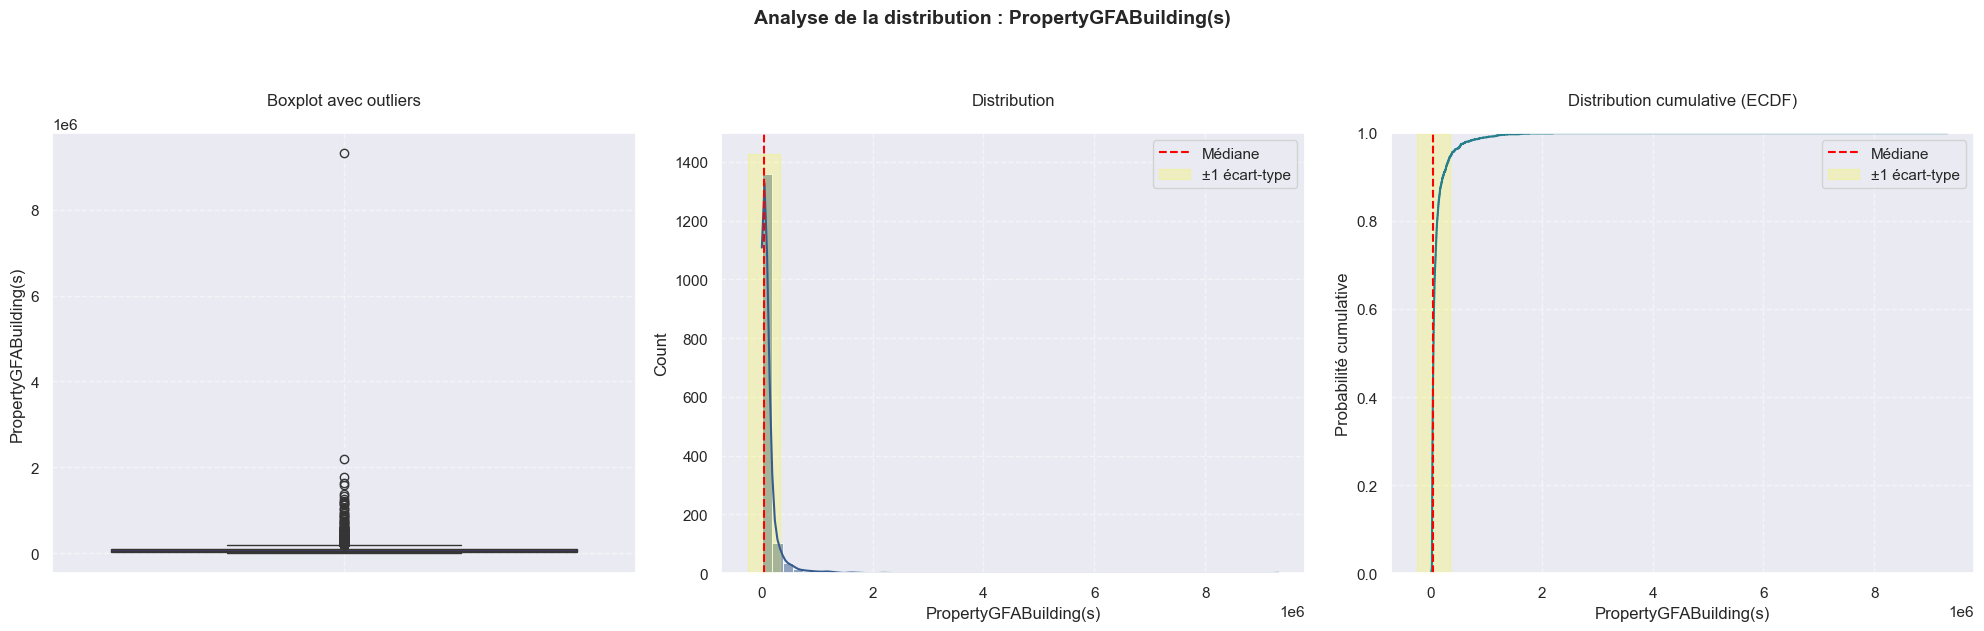


Analyse de Latitude:
count    1537.000000
mean       47.616447
std         0.047081
min        47.509590
25%        47.587670
50%        47.612560
75%        47.649090
max        47.733870
Name: Latitude, dtype: float64


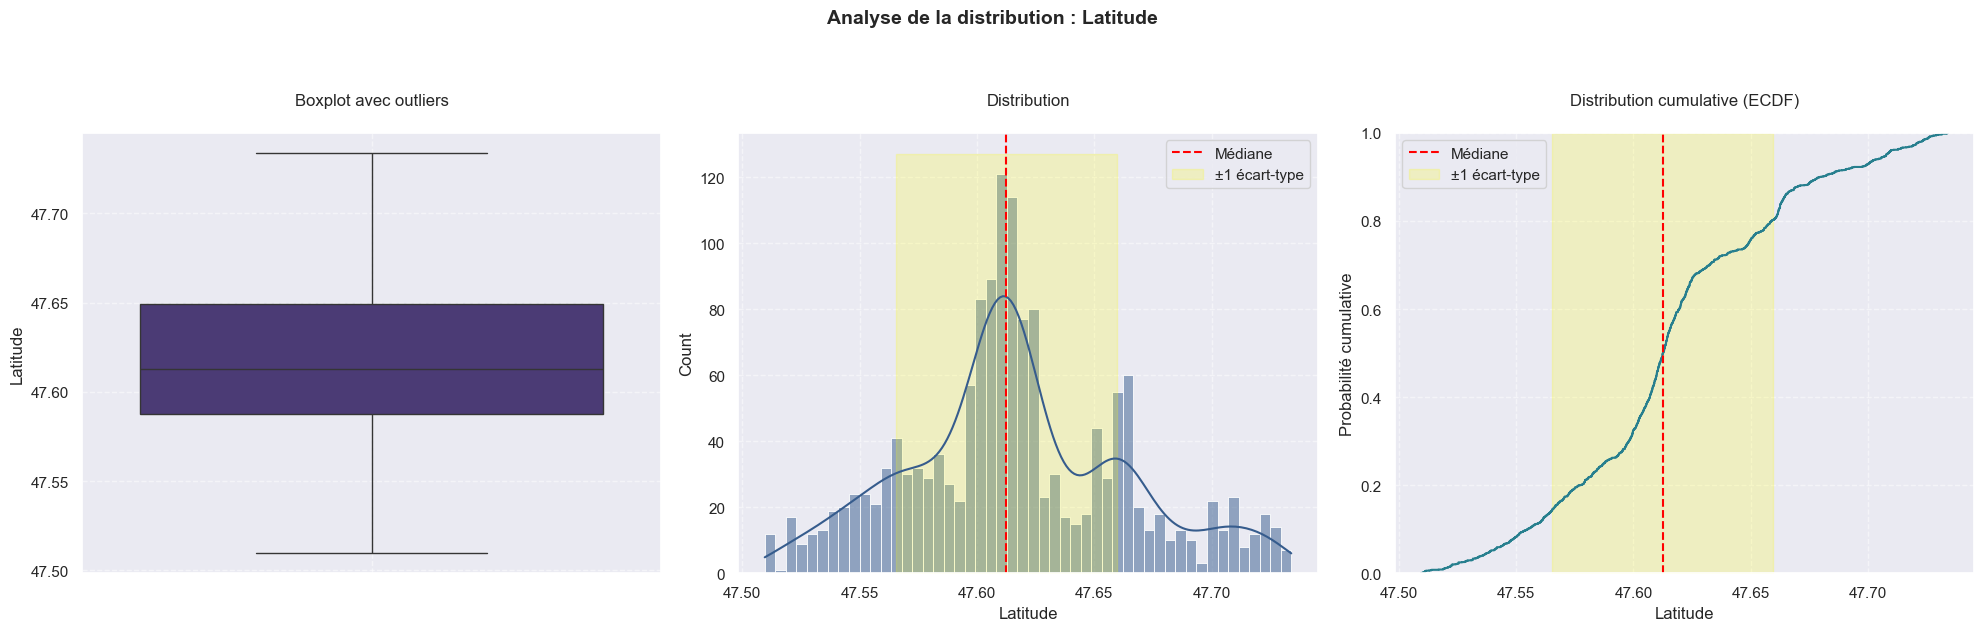


Analyse de Longitude:
count    1537.000000
mean     -122.333544
std         0.023303
min      -122.411820
25%      -122.343140
50%      -122.333160
75%      -122.322720
max      -122.261800
Name: Longitude, dtype: float64


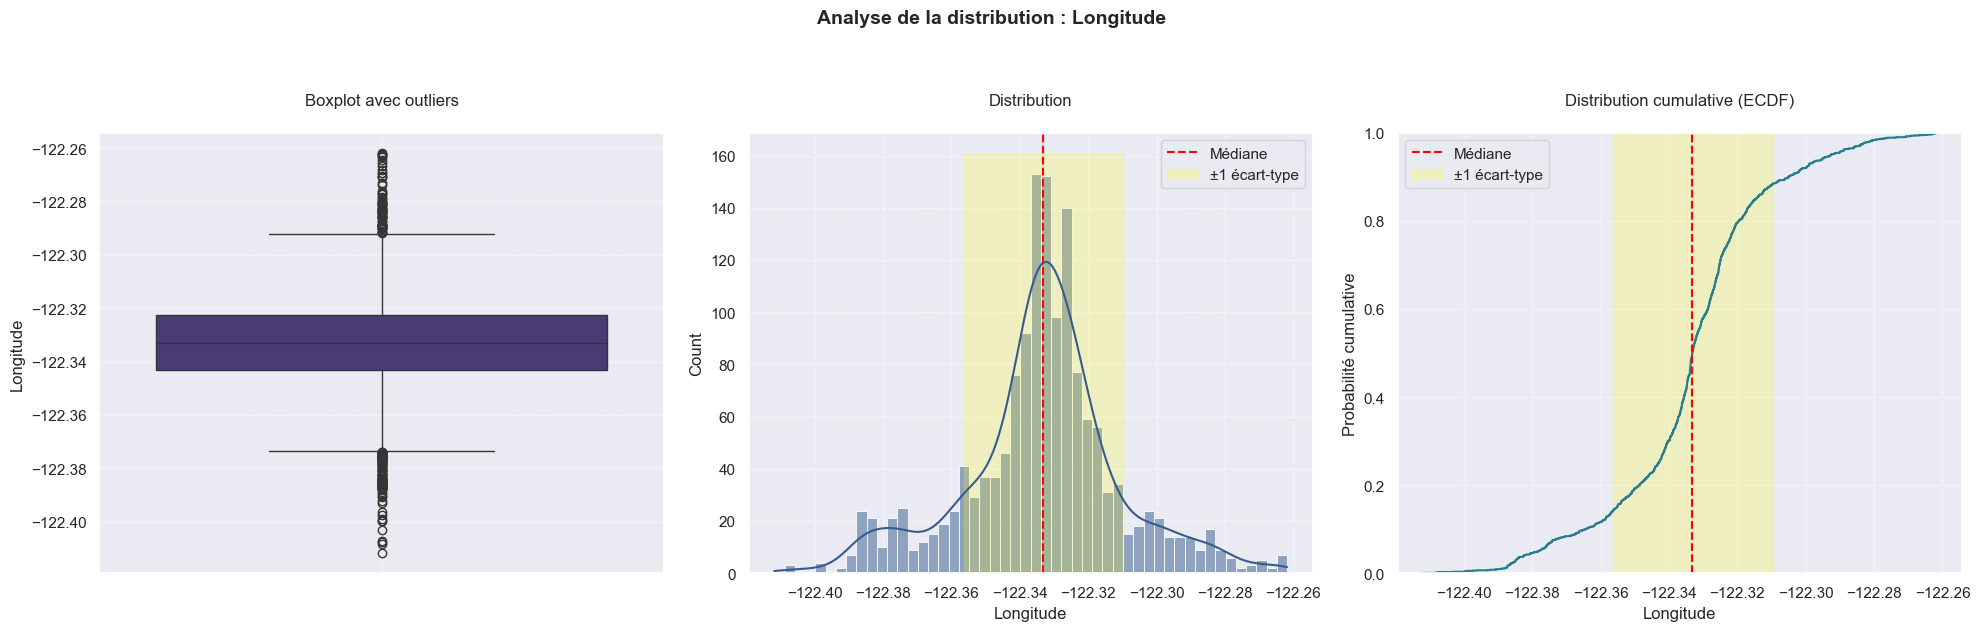


Analyse de YearBuilt:
count    1537.000000
mean     1961.581002
std        32.800793
min      1900.000000
25%      1930.000000
50%      1965.000000
75%      1988.000000
max      2015.000000
Name: YearBuilt, dtype: float64


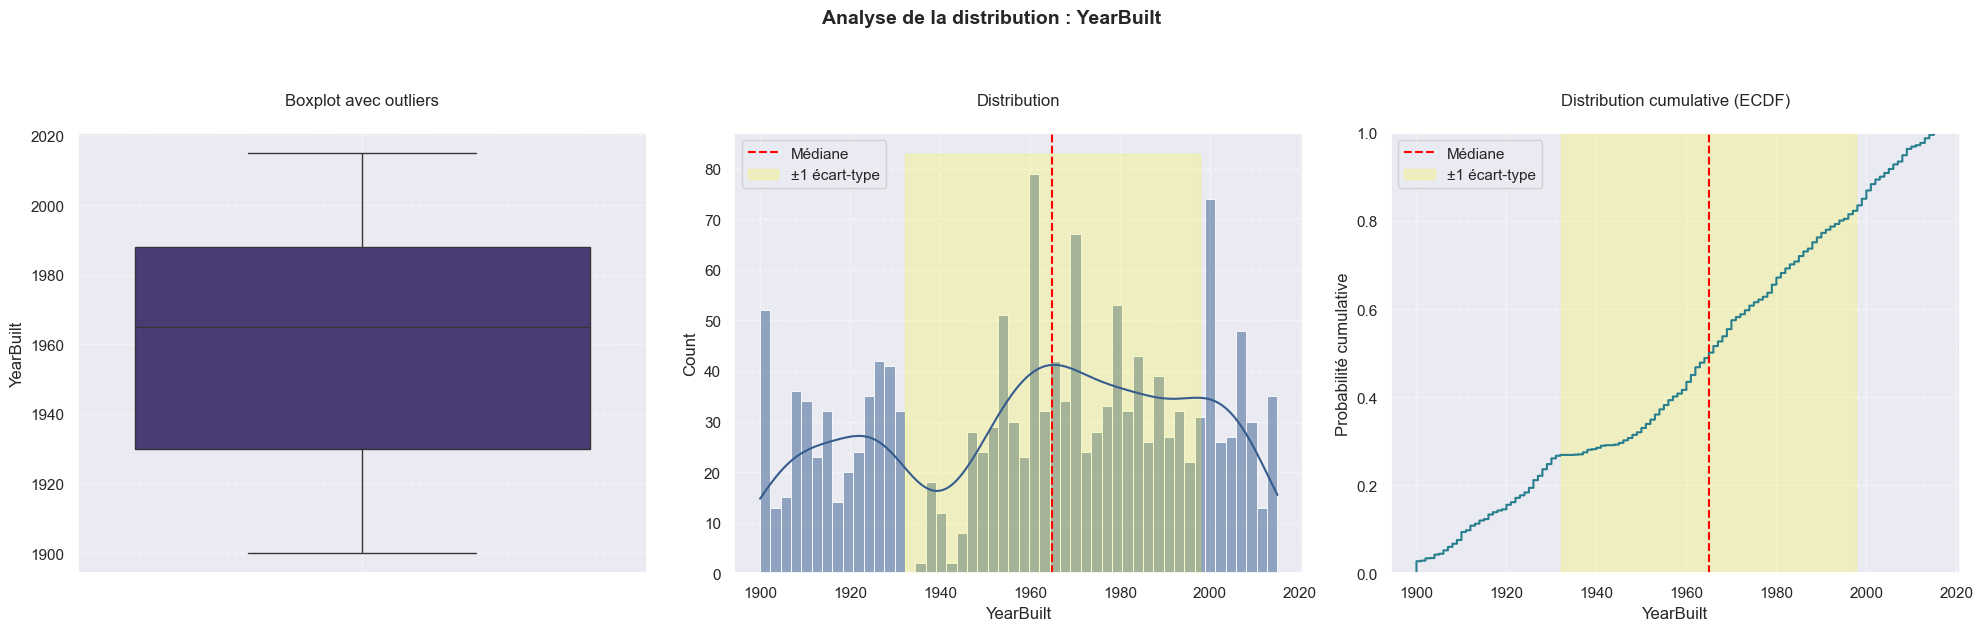


Analyse de LargestPropertyUseTypeGFA:
count    1.533000e+03
mean     1.002638e+05
std      2.864102e+05
min      5.656000e+03
25%      2.520000e+04
50%      4.225200e+04
75%      9.230000e+04
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64


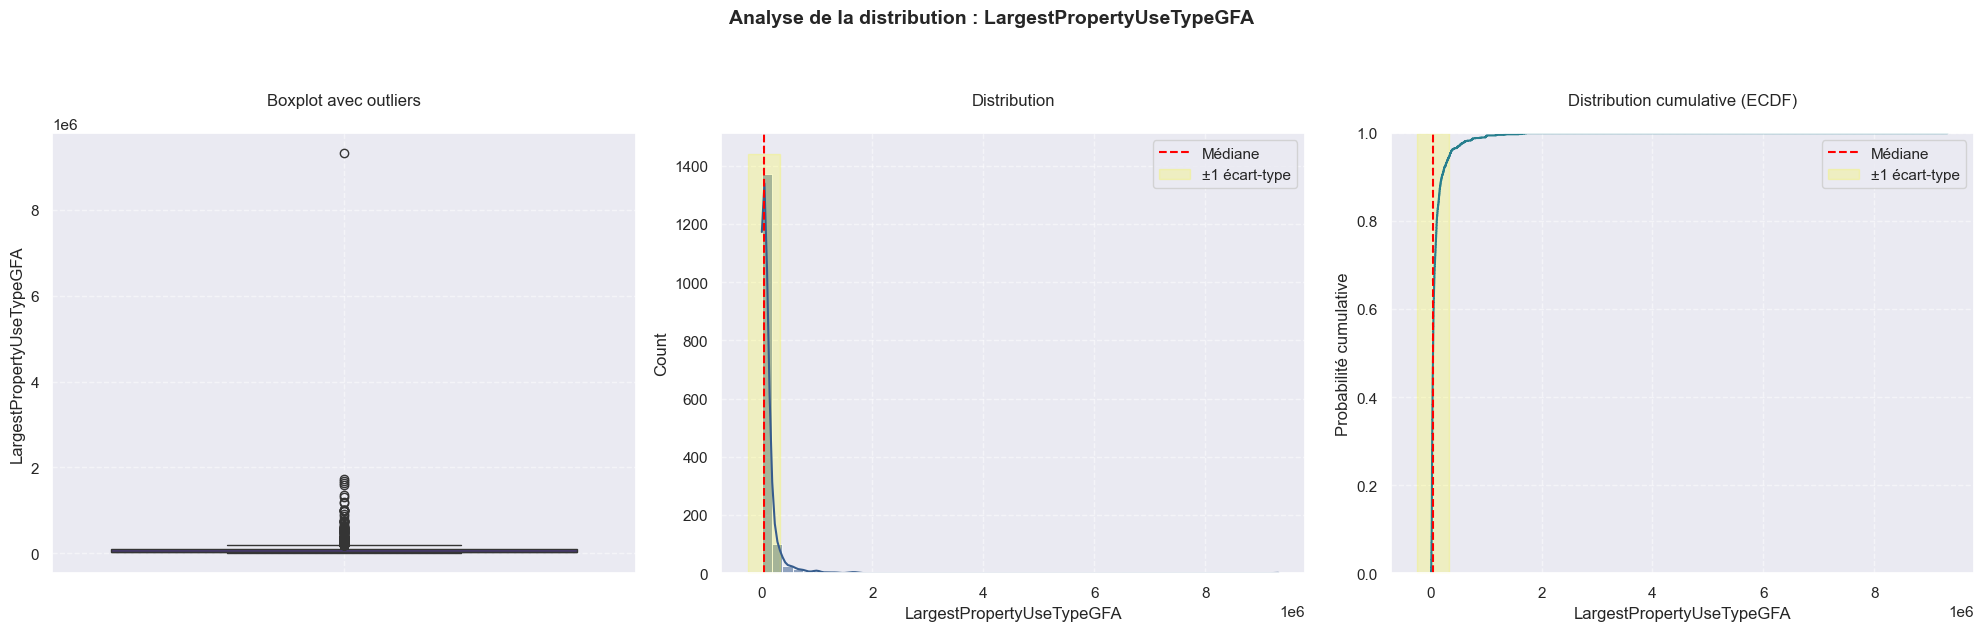


Analyse de SecondLargestPropertyUseTypeGFA:
count       832.000000
mean      36228.893386
std       66343.619665
min           0.000000
25%        5406.000000
50%       12062.500000
75%       31770.750000
max      639931.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64


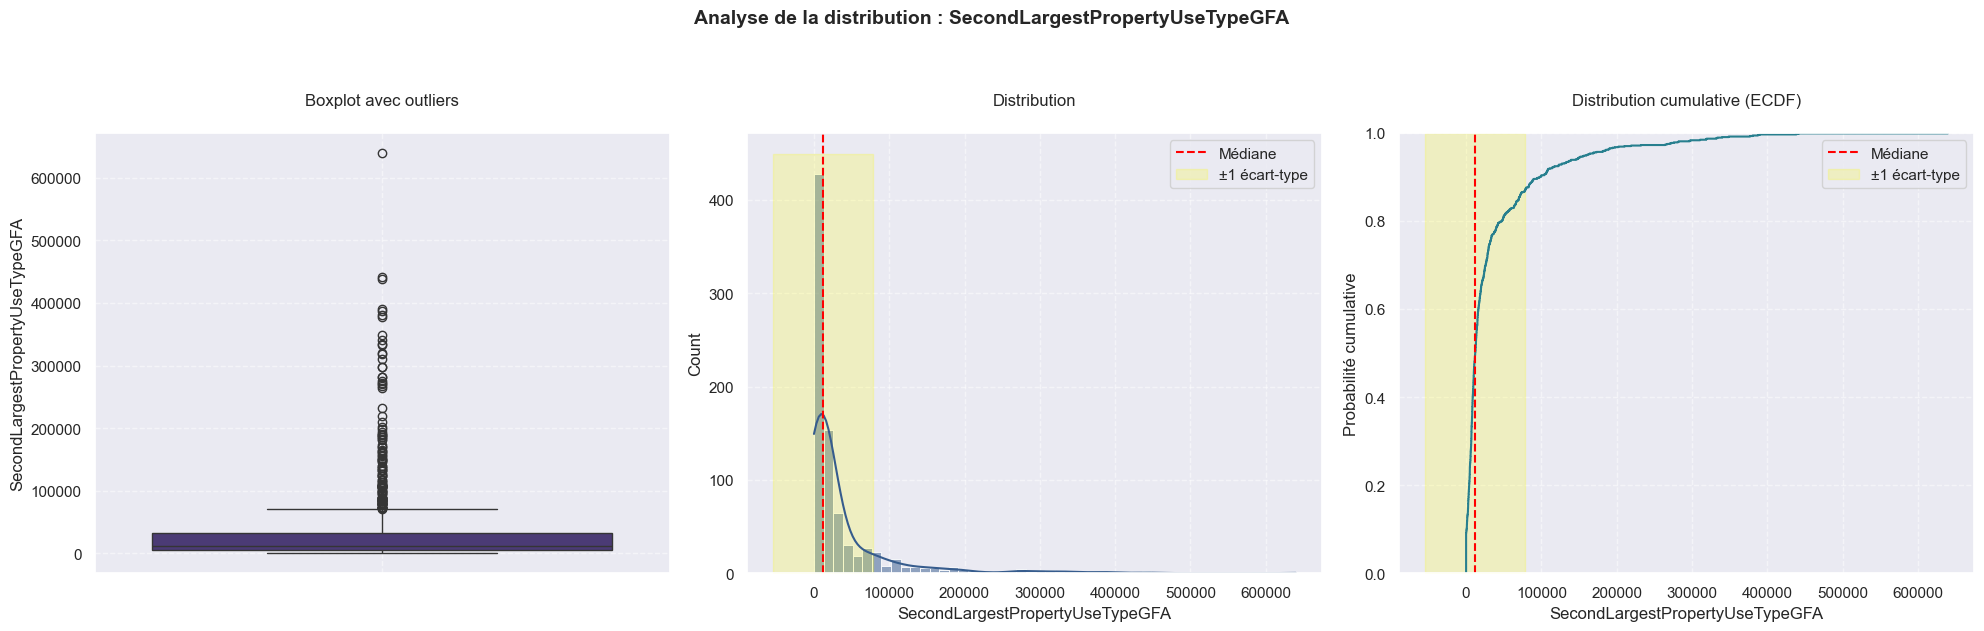


Analyse de ENERGYSTARScore:
count    993.000000
mean      63.600201
std       28.827670
min        1.000000
25%       44.000000
50%       71.000000
75%       88.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64


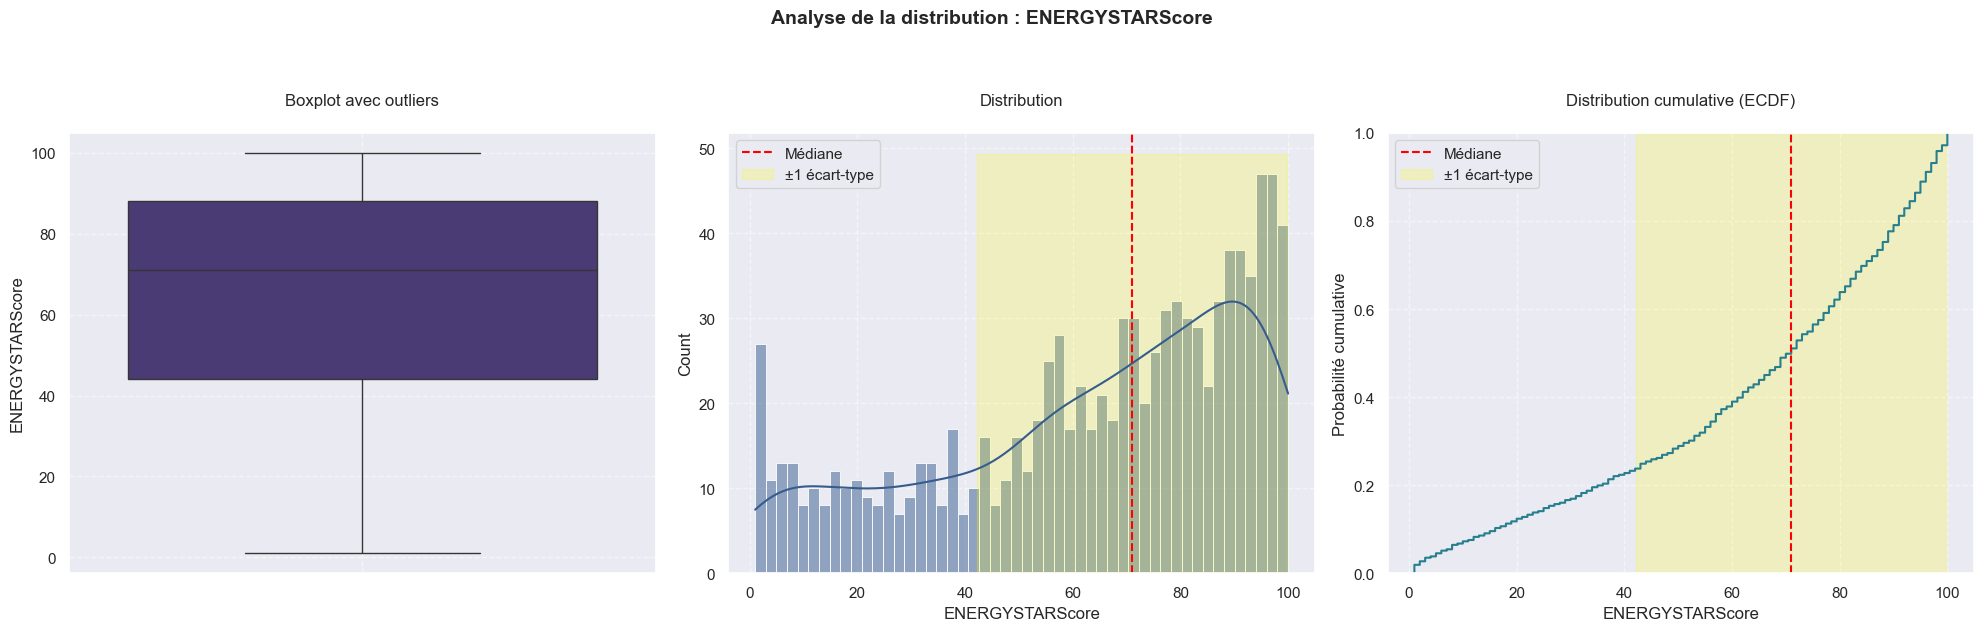


Analyse de SiteEUI(kBtu/sf):
count    1537.000000
mean       75.198894
std        75.423945
min         1.400000
25%        34.900002
50%        53.700001
75%        85.099998
max       834.400024
Name: SiteEUI(kBtu/sf), dtype: float64


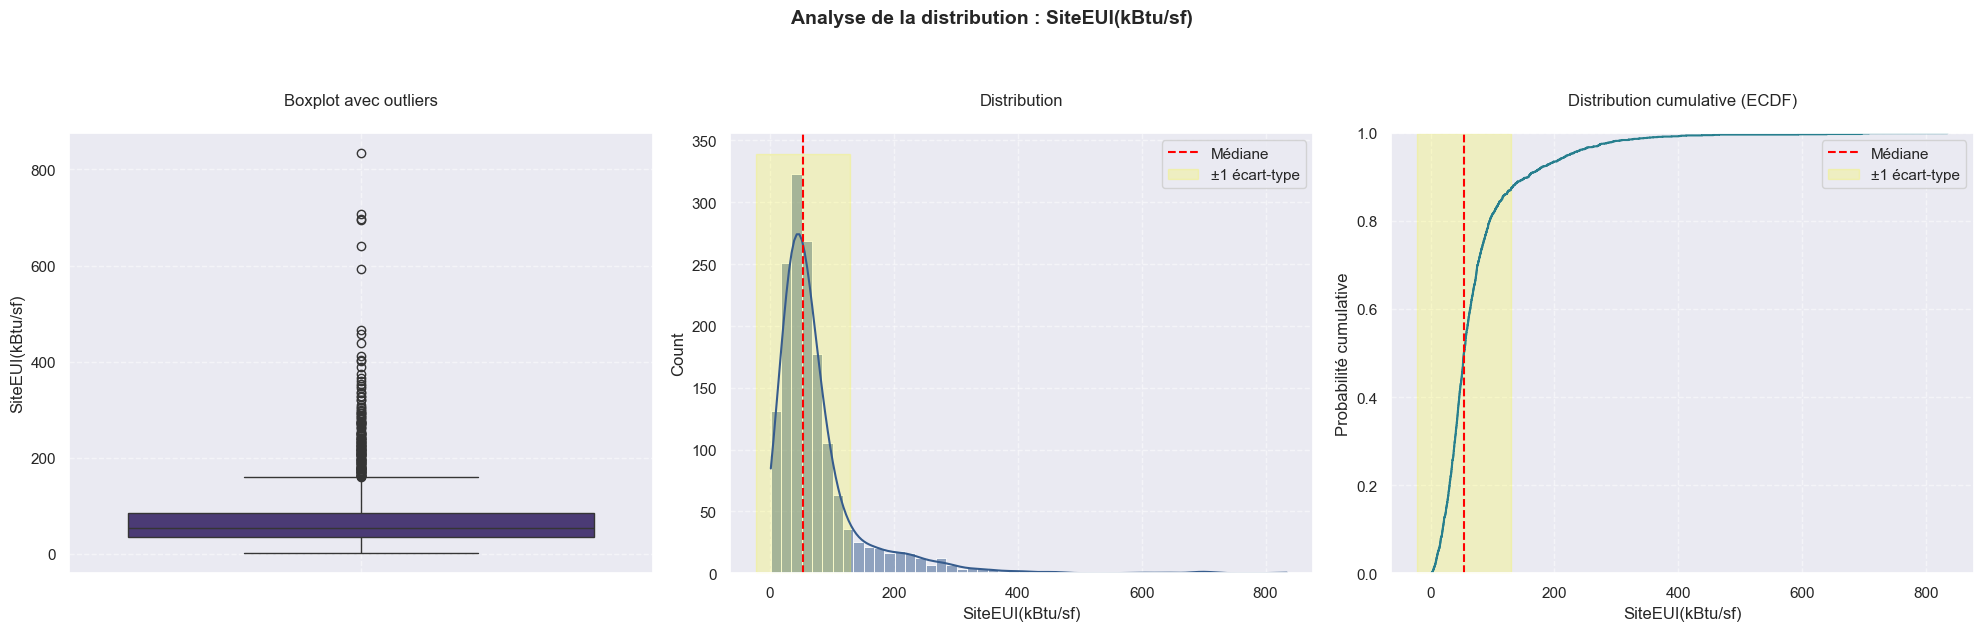


Analyse de SourceEUI(kBtu/sf):
count    1537.000000
mean      183.428237
std       188.492737
min         0.000000
25%        81.400002
50%       138.699997
75%       213.199997
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64


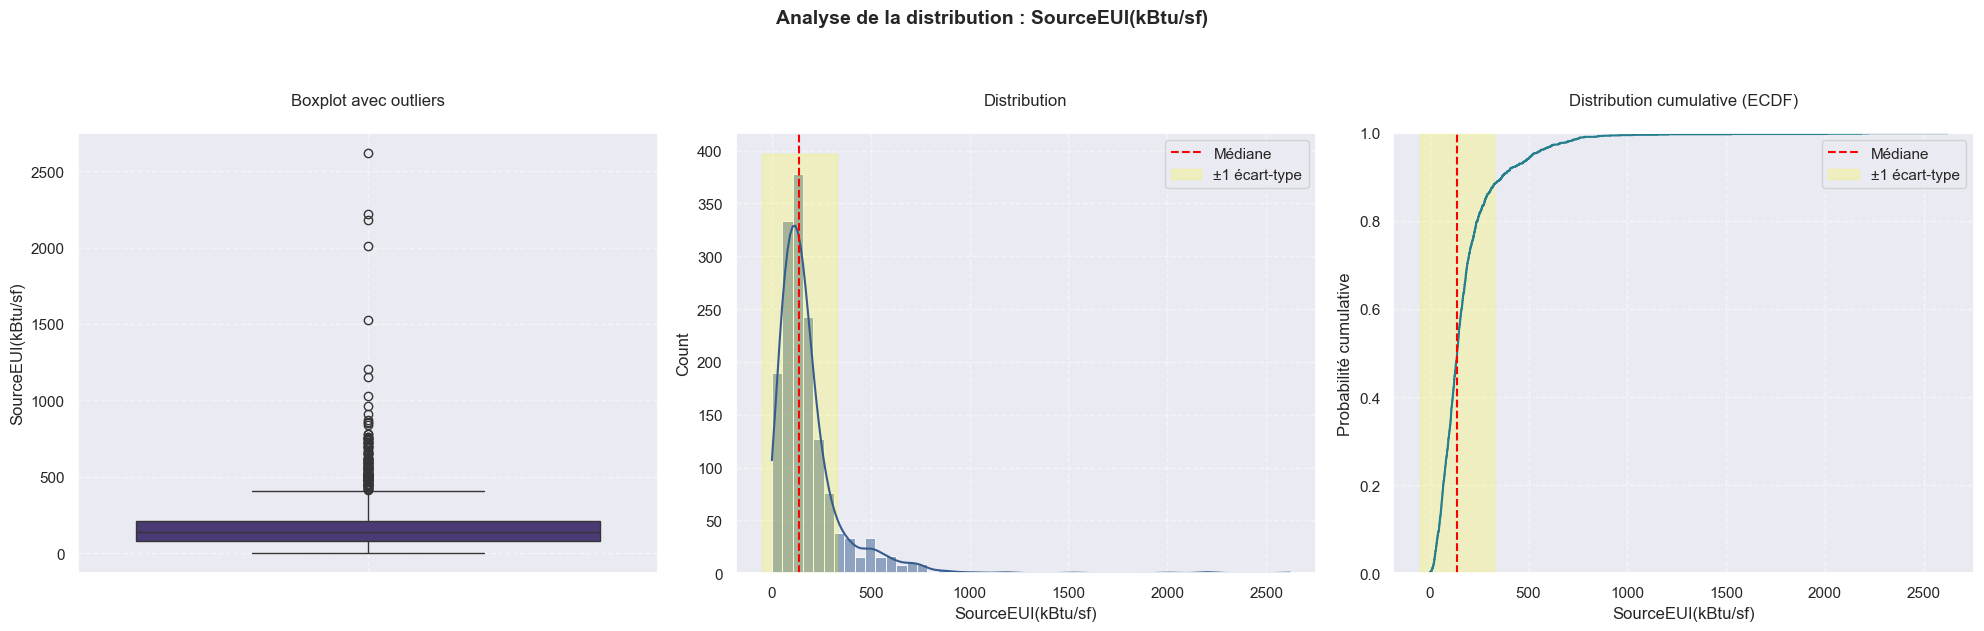


Analyse de SiteEnergyUse(kBtu):
count    1.537000e+03
mean     8.887000e+06
std      3.140995e+07
min      5.713320e+04
25%      1.252324e+06
50%      2.735166e+06
75%      7.305474e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64


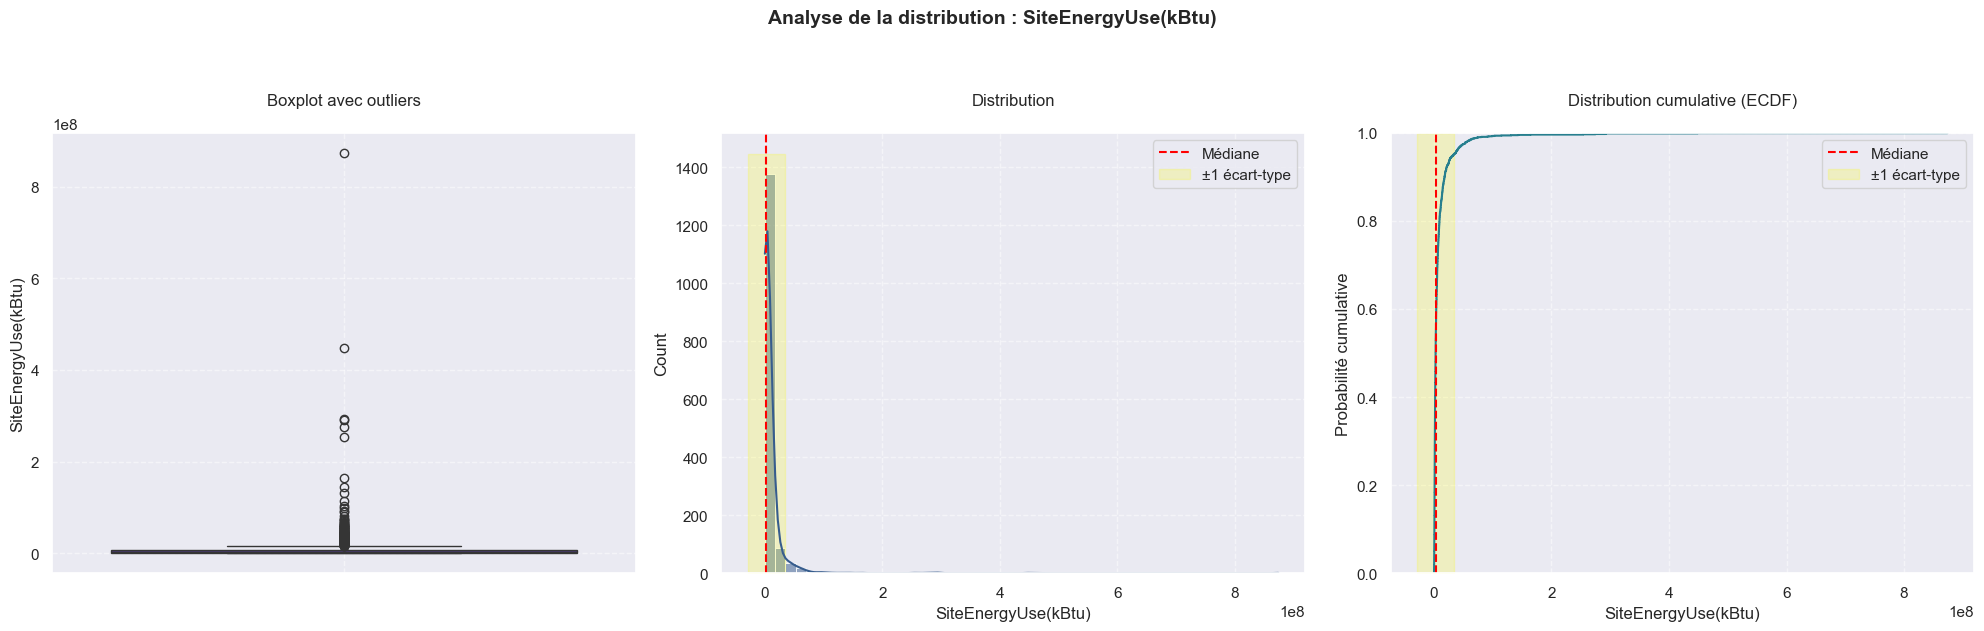


Analyse de Electricity(kBtu):
count    1.537000e+03
mean     6.155581e+06
std      2.158120e+07
min     -1.154170e+05
25%      7.293970e+05
50%      1.747974e+06
75%      5.266334e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64


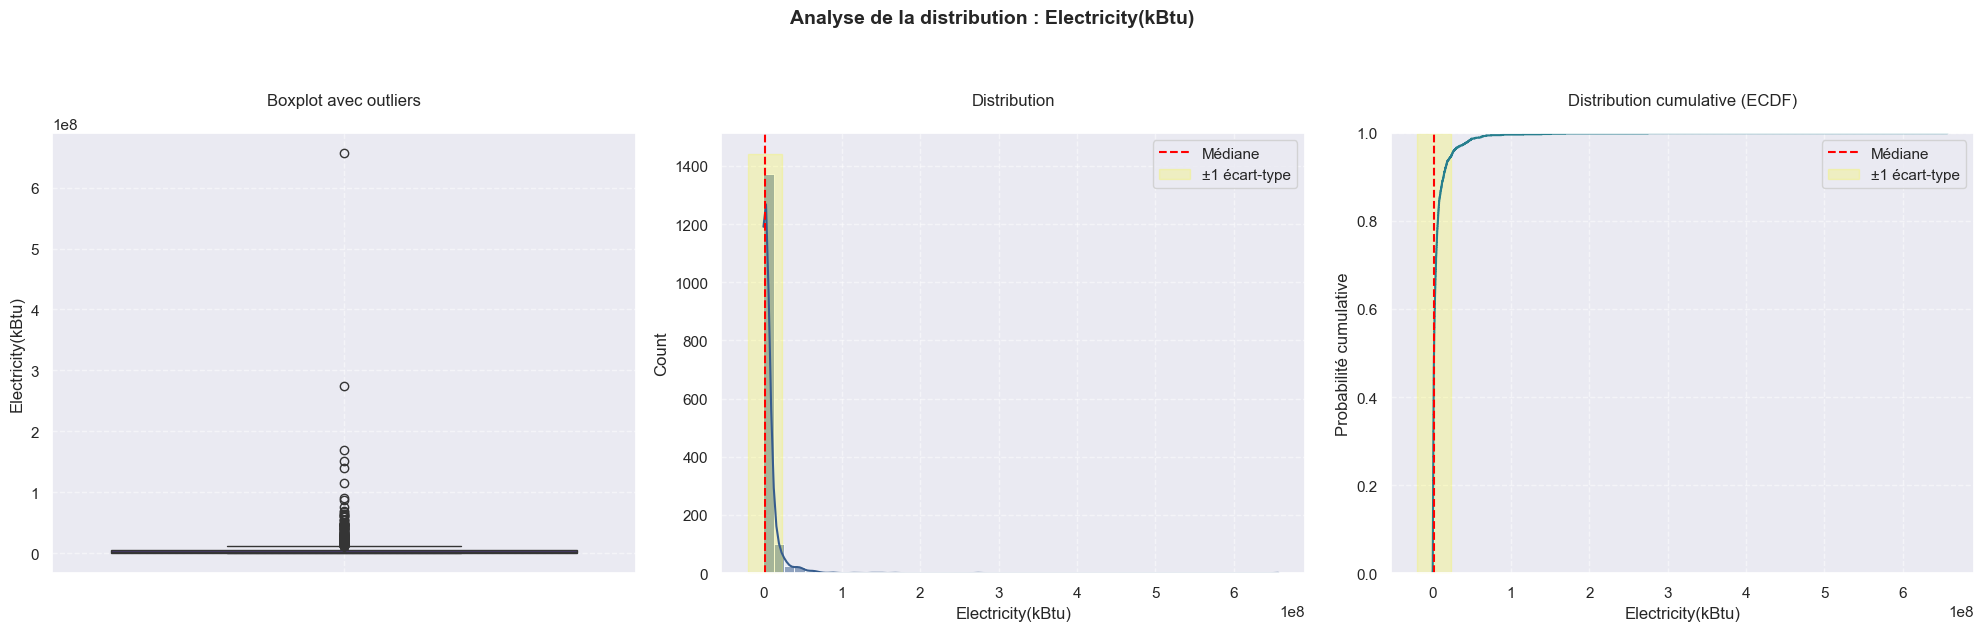


Analyse de NaturalGas(kBtu):
count    1.537000e+03
mean     2.045625e+06
std      9.744058e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.902260e+05
75%      1.531185e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64


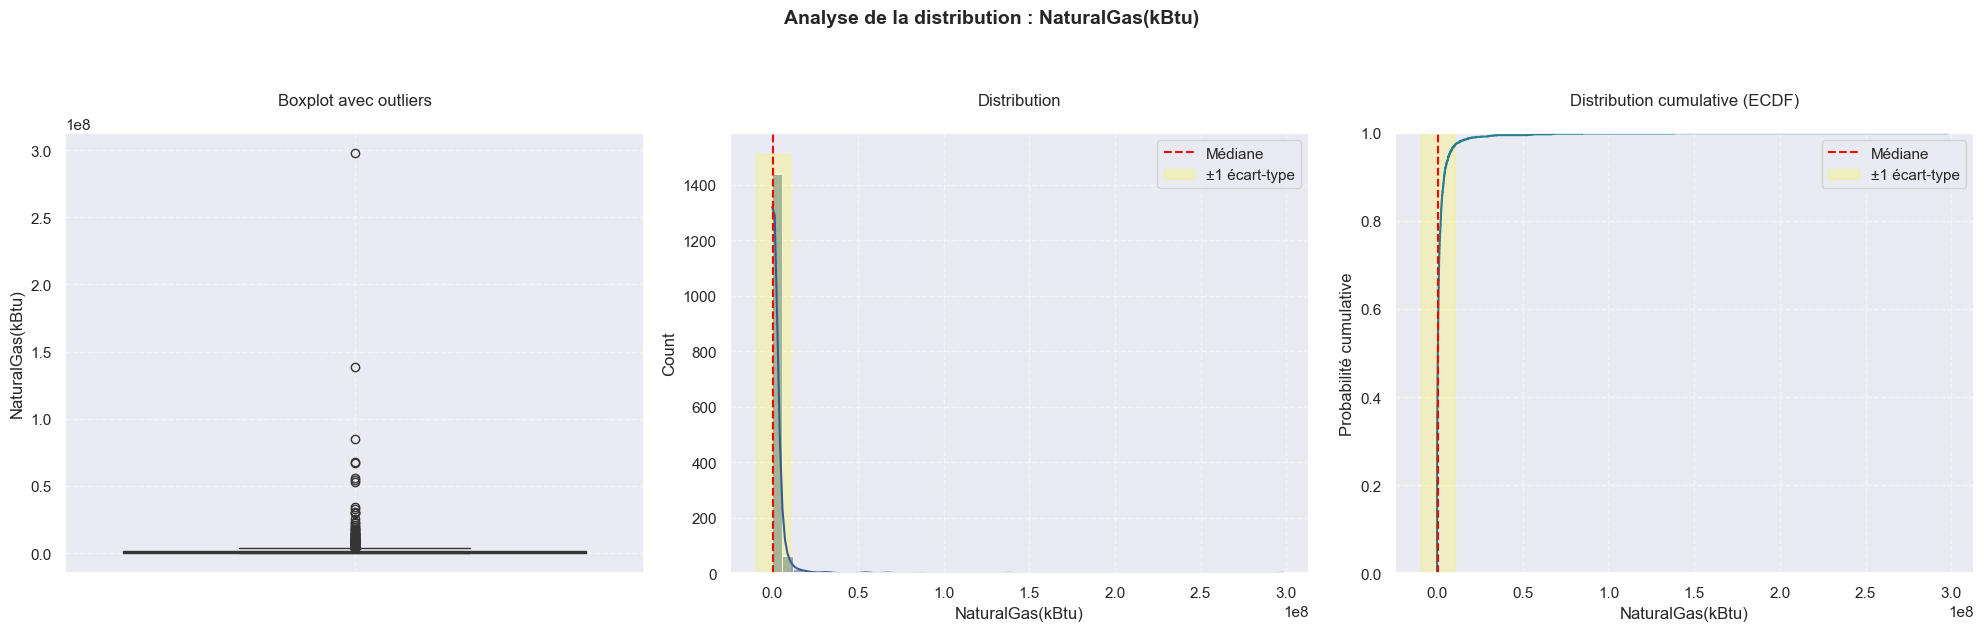


Analyse de SteamUse(kBtu):
count    1.537000e+03
mean     5.551278e+05
std      5.738751e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.349435e+08
Name: SteamUse(kBtu), dtype: float64


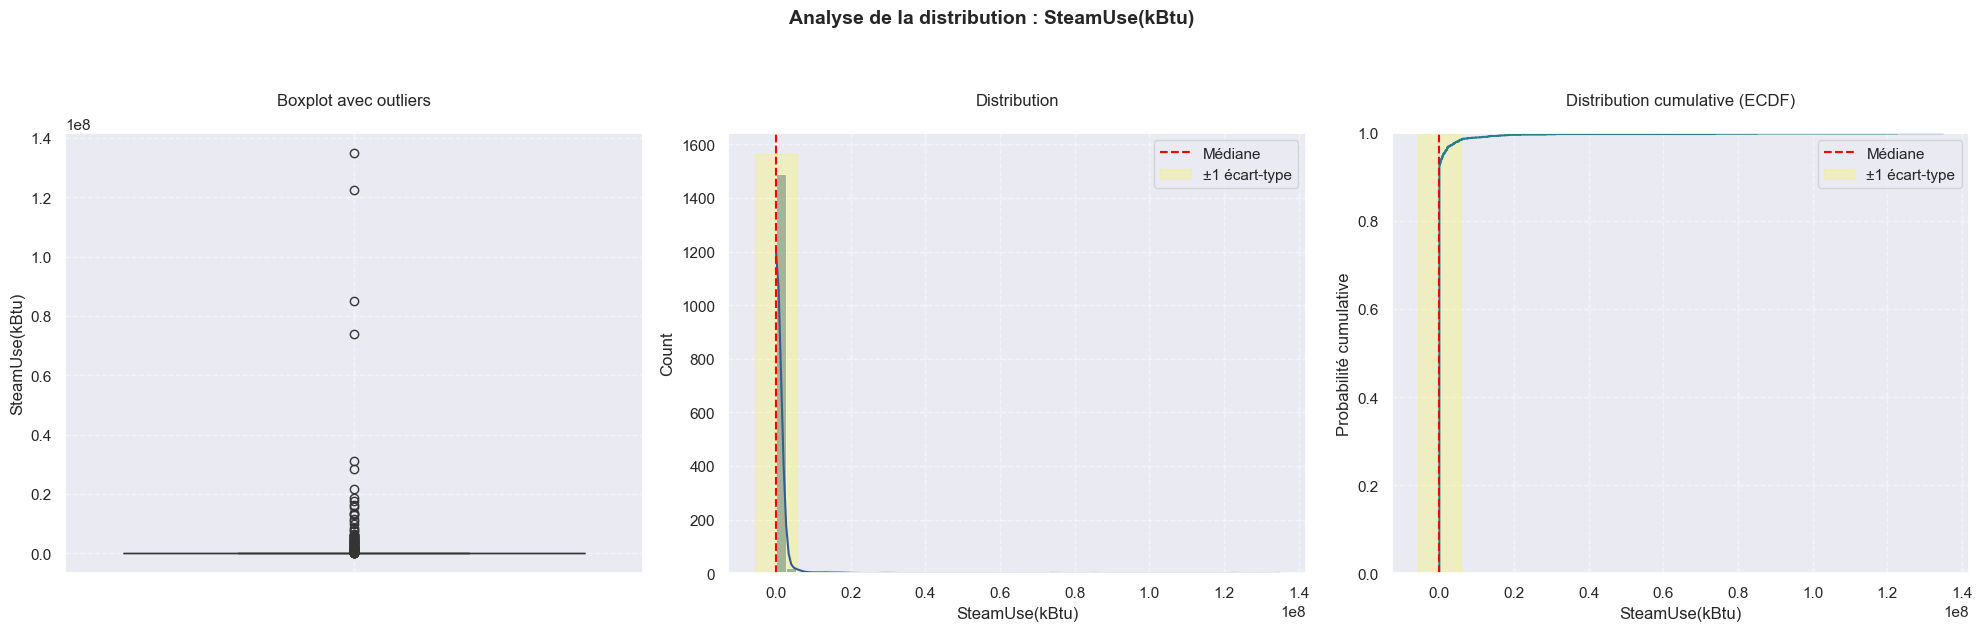


Analyse de TotalGHGEmissions:
count     1537.000000
mean       194.405335
std        781.765973
min         -0.800000
25%         20.640000
50%         49.980000
75%        147.750000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64


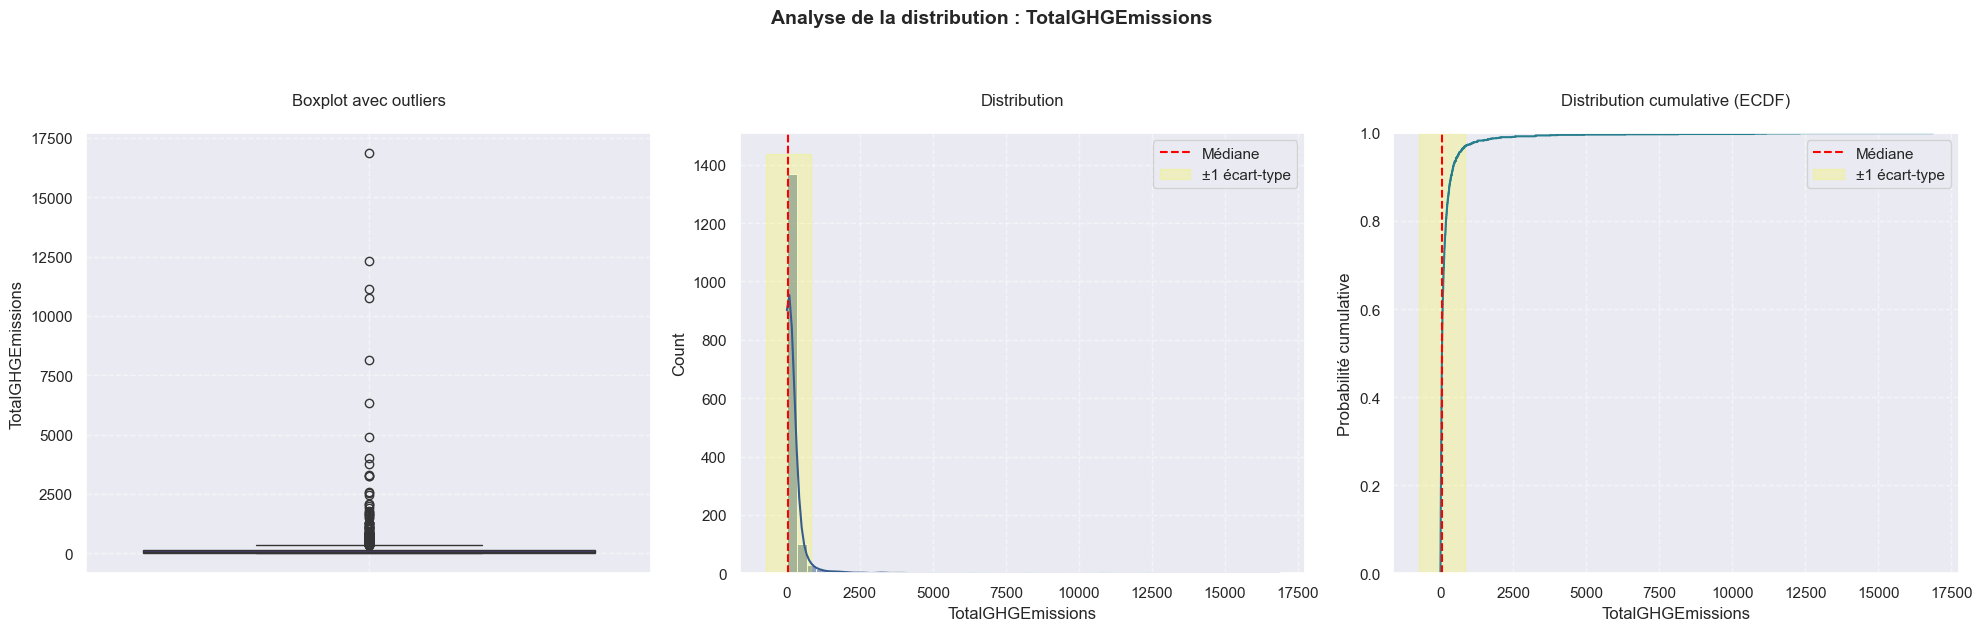


Analyse de GHGEmissionsIntensity:
count    1537.000000
mean        1.672245
std         2.414515
min        -0.020000
25%         0.360000
50%         0.880000
75%         1.960000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64


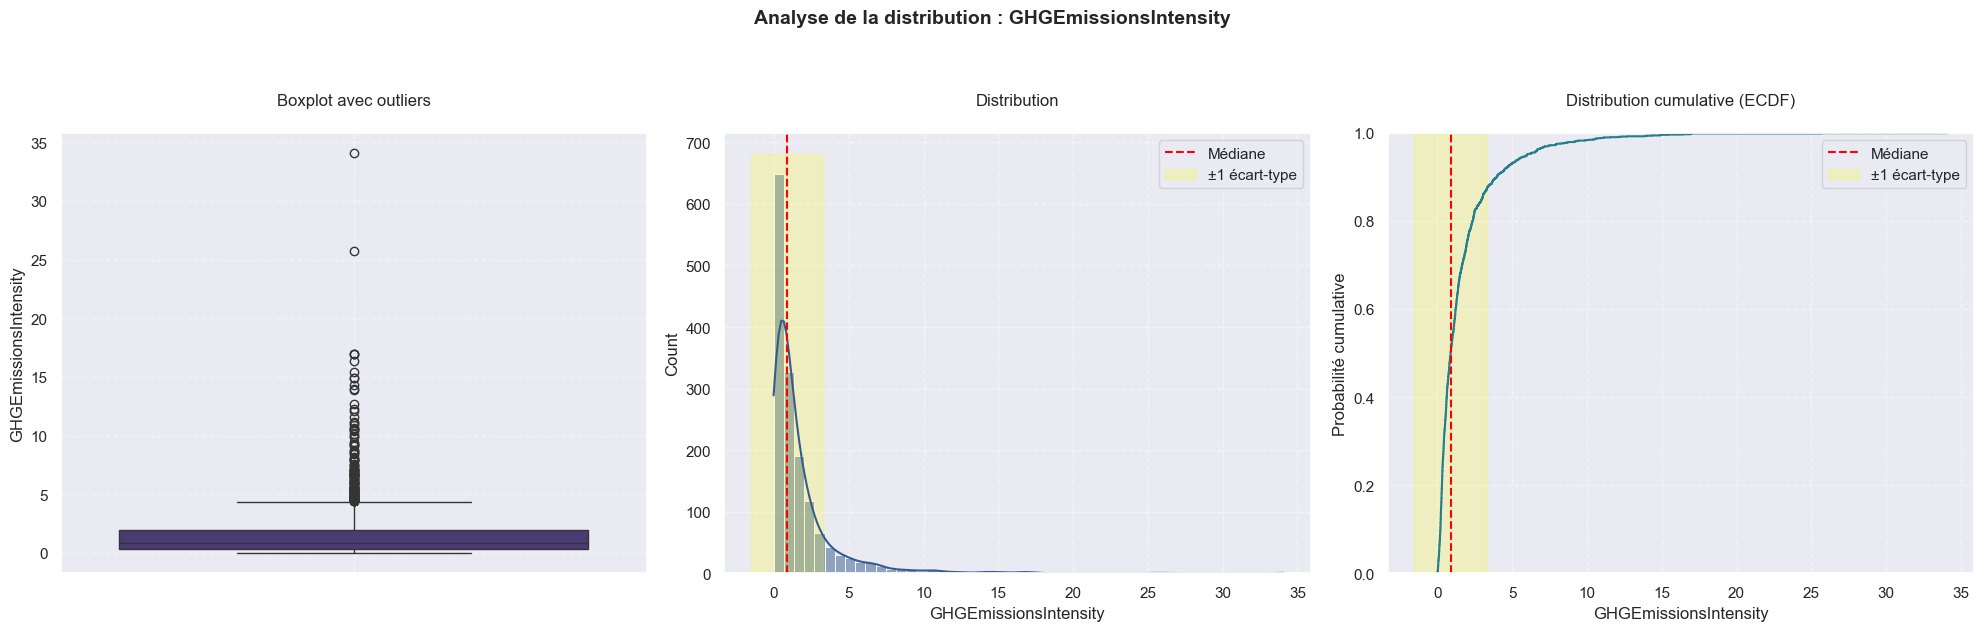

In [31]:
#visualisations pour analyser la distribution d'une variable 
#(Boxplot avec outliers, Histogramme avec courbe de densité et Courbe de distribution cumulative (ECDF)


def visualiser_distribution(df, colonne, echelle='linear', bins=50, palette='viridis', titre=None):
    df = df.copy()
    df = df[df[colonne].notna()]  # Suppression des valeurs NaN
    
    if df[colonne].empty:
        print(f"Aucune donnée valide pour {colonne}.")
        return
        
    # Calcul des statistiques
    stats = df[colonne].describe()
    mediane = stats['50%']
    std = stats['std']
    
    # Création de la figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    
    # Boxplot
    sns.boxplot(y=df[colonne], ax=ax1, color=sns.color_palette(palette)[0], showfliers=True)
    ax1.set_title('Boxplot avec outliers', pad=20)
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.set_ylabel(colonne)
    
    # Histogramme avec KDE
    sns.histplot(df[colonne], bins=bins, ax=ax2, kde=True, color=sns.color_palette(palette)[1])
    ax2.axvline(x=mediane, color='red', linestyle='--', label='Médiane')
    ax2.fill_between([mediane-std, mediane+std], 0, ax2.get_ylim()[1], 
                     color='yellow', alpha=0.2, label='±1 écart-type')
    ax2.set_title('Distribution', pad=20)
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.set_xlabel(colonne)
    
    # ECDF
    sns.ecdfplot(df[colonne], ax=ax3, color=sns.color_palette(palette)[2])
    ax3.axvline(x=mediane, color='red', linestyle='--', label='Médiane')
    ax3.fill_betweenx([0, 1], mediane-std, mediane+std, 
                      color='yellow', alpha=0.2, label='±1 écart-type')
    ax3.set_title('Distribution cumulative (ECDF)', pad=20)
    ax3.set_xlabel(colonne)
    ax3.set_ylabel('Probabilité cumulative')
    ax3.legend()
    ax3.grid(True, linestyle='--', alpha=0.5)
    
    # Application de l'échelle
    if echelle == 'log':
        for ax in [ax1, ax2]:
            ax.set_yscale('log')
            
    # Titre global
    fig.suptitle(titre or f'Analyse de la distribution : {colonne}', 
                y=1.05, fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    return fig

def analyser_variables(df):

    variables = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)',
                 'Latitude','Longitude','YearBuilt',
                 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
                 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
                 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)',
                 'TotalGHGEmissions', 'GHGEmissionsIntensity'
                ]
    
    for var in variables:
        print(f"\nAnalyse de {var}:")
        print(df[var].describe())
        fig = visualiser_distribution(df, var, palette='viridis', 
                                    titre=f'Analyse de la distribution : {var}')
        plt.show()


# Utilisation :
analyser_variables(clean_df)

In [32]:
# Suppression de SecondLargestPropertyUseTypeGFA et SecondLargestPropertyUseType car env 50% de valeurs manquantes et grandes disparités
cols_to_drop = ['SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseType']
# Nouveau dataframe
clean_df = clean_df.drop(columns=cols_to_drop)

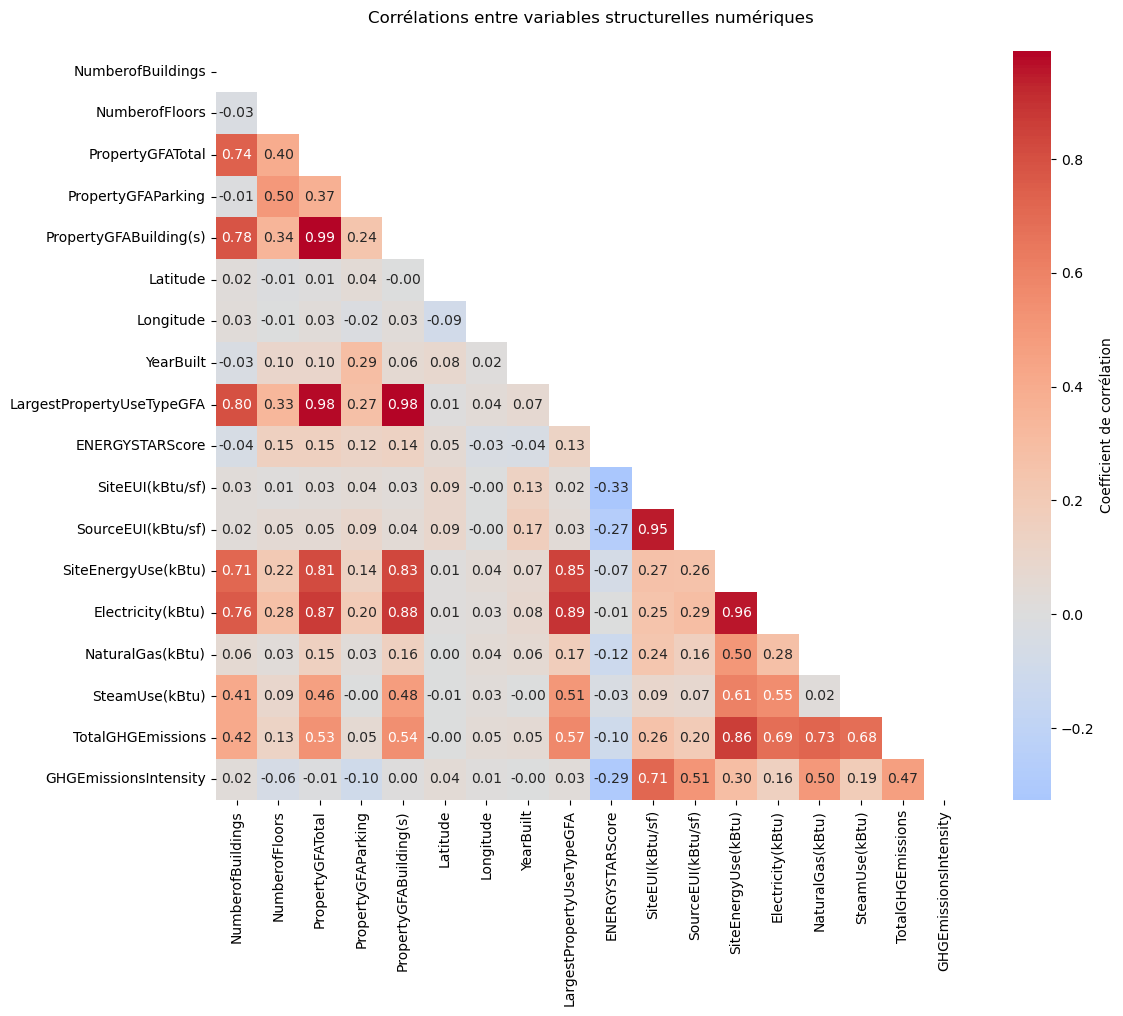

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')

def plot_structural_correlations(df):
    # Variables numériques
    numeric_vars = [
        'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
        'Latitude', 'Longitude', 'YearBuilt',
        'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
        'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
        'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)',
        'TotalGHGEmissions', 'GHGEmissionsIntensity'
    ]
    
    # Calcul de la matrice de corrélation
    correlation_matrix = df[numeric_vars].corr()
    
    # Suppression de la diagonale
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Création de la figure
    plt.figure(figsize=(12, 10))  # Taille ajustée pour une meilleure lisibilité
    
    # Création de la heatmap sans la diagonale
    sns.heatmap(
        correlation_matrix,
        mask=mask,           # Masque la partie supérieure (diagonale incluse)
        annot=True,          # Affiche les valeurs
        cmap='coolwarm',     # Rouge pour positif, bleu pour négatif
        center=0,            # Centre la colormap sur 0
        fmt='.2f',           # Format des valeurs à 2 décimales
        square=True,         # Cellules carrées
        cbar_kws={'label': 'Coefficient de corrélation'}  # Label de la barre de couleur
    )
    
    # Personnalisation du graphique
    plt.title('Corrélations entre variables structurelles numériques', pad=20)
    plt.tight_layout()
    
    # Affichage
    plt.show()

# Appel de la fonction
plot_structural_correlations(clean_df)


In [34]:
# Liste des colonnes à supprimer car redondant/inopportun

cols_to_drop = ['LargestPropertyUseTypeGFA','SourceEUI(kBtu/sf)','GHGEmissionsIntensity' ]
# Nouveau dataframe
clean_df = clean_df.drop(columns=cols_to_drop)

### Variables catégorielles (et ZipCode)


Analyse de PrimaryPropertyType

Statistiques détaillées pour PrimaryPropertyType:

Nombre total d'observations: 1537
Nombre de valeurs uniques: 20

Détails par catégorie:
                             Count  Percentage  Cumulative %
PrimaryPropertyType                                         
Small- and Mid-Sized Office    286       18.61         18.61
Other                          245       15.94         34.55
Warehouse                      185       12.04         46.58
Large Office                   169       11.00         57.58
Mixed Use Property             104        6.77         64.35
Retail Store                    85        5.53         69.88
Hotel                           75        4.88         74.76
Worship Facility                69        4.49         79.25
Distribution Center             53        3.45         82.69
K-12 School                     50        3.25         85.95
Supermarket / Grocery Store     40        2.60         88.55
Medical Office                  39 

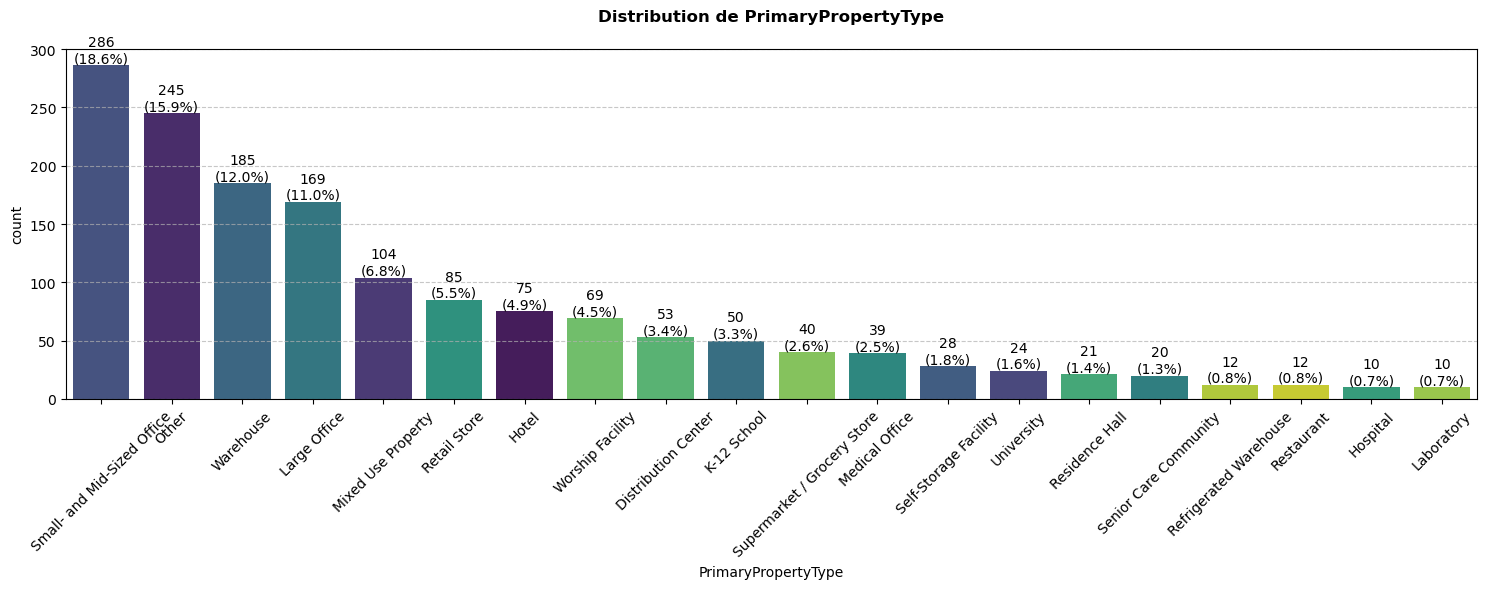


Analyse de Neighborhood

Statistiques détaillées pour Neighborhood:

Nombre total d'observations: 1537
Nombre de valeurs uniques: 19

Détails par catégorie:
                        Count  Percentage  Cumulative %
Neighborhood                                           
DOWNTOWN                  347       22.58         22.58
GREATER DUWAMISH          328       21.34         43.92
MAGNOLIA / QUEEN ANNE     143        9.30         53.22
LAKE UNION                141        9.17         62.39
NORTHEAST                 116        7.55         69.94
EAST                      114        7.42         77.36
NORTHWEST                  74        4.81         82.17
BALLARD                    58        3.77         85.95
NORTH                      51        3.32         89.26
CENTRAL                    42        2.73         92.00
DELRIDGE                   36        2.34         94.34
SOUTHWEST                  31        2.02         96.36
SOUTHEAST                  31        2.02         98.37
No

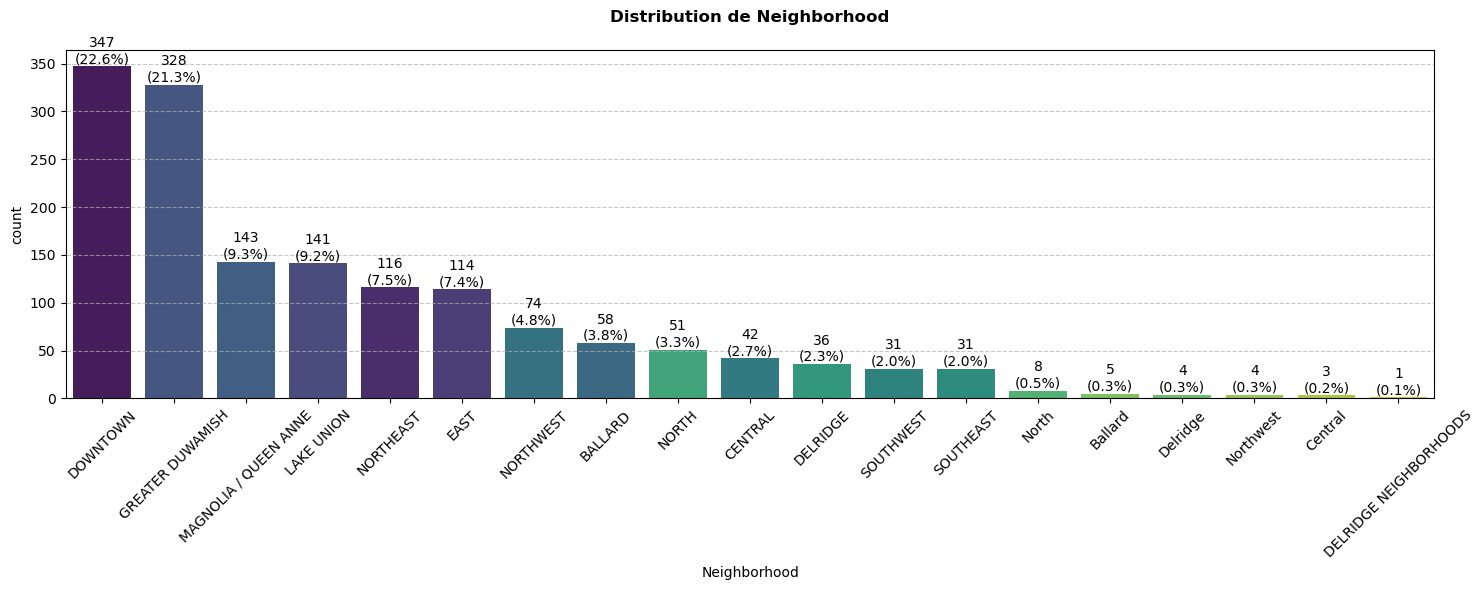

In [35]:
#visualisations pour analyser la distribution d'une variable catégorielle (histogramme de fréquence (countplot) et tableau des statistiques
def visualiser_variable_categorielle(df, colonne, figsize=(15, 6), palette='viridis', rotation=45):
    # Création de la figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Calcul des value counts avec pourcentages
    value_counts = df[colonne].value_counts()
    value_counts_pct = df[colonne].value_counts(normalize=True) * 100
    
    # Création du countplot avec hue explicite
    sns.countplot(data=df, x=colonne, hue=colonne, order=value_counts.index, 
                 palette=palette, legend=False)
    
    # Ajout des valeurs sur les barres
    for i, (idx, count) in enumerate(value_counts.items()):
        percentage = value_counts_pct.loc[idx]
        ax.text(i, count, f'{count}\n({percentage:.1f}%)', 
                ha='center', va='bottom')
    
    # Personnalisation du graphique
    plt.title(f'Distribution de {colonne}', pad=20, fontsize=12, fontweight='bold')
    plt.xticks(rotation=rotation)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Ajustement du layout pour éviter le chevauchement
    plt.tight_layout()
    
    # Affichage des statistiques détaillées
    stats_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_counts_pct,
        'Cumulative %': value_counts_pct.cumsum()
    })
    
    print(f"\nStatistiques détaillées pour {colonne}:")
    print("\nNombre total d'observations:", len(df))
    print("Nombre de valeurs uniques:", len(value_counts))
    print("\nDétails par catégorie:")
    print(stats_df.round(2))
    
    return fig

def analyser_variables_categorielles(df):
    """
    Analyse toutes les variables catégorielles du dataset
    """
    variables_categorielles = ['PrimaryPropertyType','LargestPropertyUseType',
                               'Neighborhood'
                              ]
    
    for var in variables_categorielles:
        if var in df.columns:
            print("\n" + "="*50)
            print(f"Analyse de {var}")
            print("="*50)
            fig = visualiser_variable_categorielle(df, var)
            plt.show()

# Utilisation :
analyser_variables_categorielles(clean_df)

In [36]:
# Statistiques descriptives
print("Statistiques descriptives:")
display(clean_df.describe())

Statistiques descriptives:


OSEBuildingID       ZipCode     Latitude    Longitude    YearBuilt  \
count    1537.000000   1524.000000  1537.000000  1537.000000  1537.000000   
mean    16454.384515  98116.839895    47.616447  -122.333544  1961.581002   
std     13852.501208     18.735448     0.047081     0.023303    32.800793   
min         1.000000  98006.000000    47.509590  -122.411820  1900.000000   
25%       601.000000  98104.000000    47.587670  -122.343140  1930.000000   
50%     21178.000000  98109.000000    47.612560  -122.333160  1965.000000   
75%     24601.000000  98125.000000    47.649090  -122.322720  1988.000000   
max     50226.000000  98199.000000    47.733870  -122.261800  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1537.000000     1537.000000      1.537000e+03   
mean            1.177619        4.256994      1.211367e+05   
std             3.048492        6.746406      3.063701e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.884100e+04   
50%             1.000000        2.000000      4.817900e+04   
75%             1.000000        4.000000      1.079300e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  ENERGYSTARScore  \
count         1537.000000            1.537000e+03       993.000000   
mean         13824.908913            1.073118e+05        63.600201   
std          43793.640872            2.928146e+05        28.827670   
min              0.000000            3.636000e+03         1.000000   
25%              0.000000            2.793800e+04        44.000000   
50%              0.000000            4.618300e+04        71.000000   
75%              0.000000            9.542600e+04        88.000000   
max         512608.000000            9.320156e+06       100.000000   

       SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
count       1537.000000         1.537000e+03    1.537000e+03   
mean          75.198894         8.887000e+06    5.551278e+05   
std           75.423945         3.140995e+07    5.738751e+06   
min            1.400000         5.713320e+04    0.000000e+00   
25%           34.900002         1.252324e+06    0.000000e+00   
50%           53.700001         2.735166e+06    0.000000e+00   
75%           85.099998         7.305474e+06    0.000000e+00   
max          834.400024         8.739237e+08    1.349435e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
count       1.537000e+03      1.537000e+03        1537.000000  
mean        6.155581e+06      2.045625e+06         194.405335  
std         2.158120e+07      9.744058e+06         781.765973  
min        -1.154170e+05      0.000000e+00          -0.800000  
25%         7.293970e+05      0.000000e+00          20.640000  
50%         1.747974e+06      4.902260e+05          49.980000  
75%         5.266334e+06      1.531185e+06         147.750000  
max         6.570744e+08      2.979090e+08       16870.980000

In [37]:
categorical_vars = [
    'PrimaryPropertyType', 'Neighborhood'
]

# Analyse des variables catégorielles
for var in categorical_vars:
    print(f"\nDistribution de {var}:")
    print(clean_df[var].value_counts().head())
    print(f"Nombre de catégories uniques: {clean_df[var].nunique()}")


Distribution de PrimaryPropertyType:
PrimaryPropertyType
Small- and Mid-Sized Office    286
Other                          245
Warehouse                      185
Large Office                   169
Mixed Use Property             104
Name: count, dtype: int64
Nombre de catégories uniques: 20

Distribution de Neighborhood:
Neighborhood
DOWNTOWN                 347
GREATER DUWAMISH         328
MAGNOLIA / QUEEN ANNE    143
LAKE UNION               141
NORTHEAST                116
Name: count, dtype: int64
Nombre de catégories uniques: 19


In [38]:
# Mise à jour du dataframe avec uniquement ces variables catégorielles
categorical_cols = [
    'PrimaryPropertyType', 'Neighborhood'
]

# Vérifions leur complétude
print("Valeurs manquantes dans les variables catégorielles :")
print(clean_df[categorical_cols].isnull().sum())

Valeurs manquantes dans les variables catégorielles :
PrimaryPropertyType    0
Neighborhood           0
dtype: int64


#### PrimaryPropertyType

In [39]:
# Afficher toutes les valeurs uniques avec leur compte et pourcentage
PrimaryPropertyType_stats = clean_df['PrimaryPropertyType'].value_counts().reset_index()
PrimaryPropertyType_stats.columns = ['PrimaryPropertyType', 'Count']
PrimaryPropertyType_stats['Percentage'] = (PrimaryPropertyType_stats['Count'] / len(clean_df)) * 100
PrimaryPropertyType_stats['Cumulative %'] = PrimaryPropertyType_stats['Percentage'].cumsum()

print("Distribution détaillée de PrimaryPropertyType :")
print("="*50)
print(PrimaryPropertyType_stats.to_string(index=False))

print("\nNombre total d'observations:", len(clean_df))
print("Nombre de valeurs uniques:", clean_df['PrimaryPropertyType'].nunique())
print("Nombre de valeurs nulles:", clean_df['PrimaryPropertyType'].isnull().sum())

Distribution détaillée de PrimaryPropertyType :
        PrimaryPropertyType  Count  Percentage  Cumulative %
Small- and Mid-Sized Office    286   18.607677     18.607677
                      Other    245   15.940143     34.547820
                  Warehouse    185   12.036435     46.584255
               Large Office    169   10.995446     57.579701
         Mixed Use Property    104    6.766428     64.346129
               Retail Store     85    5.530254     69.876383
                      Hotel     75    4.879636     74.756018
           Worship Facility     69    4.489265     79.245283
        Distribution Center     53    3.448276     82.693559
                K-12 School     50    3.253090     85.946649
Supermarket / Grocery Store     40    2.602472     88.549122
             Medical Office     39    2.537411     91.086532
      Self-Storage Facility     28    1.821731     92.908263
                 University     24    1.561483     94.469746
             Residence Hall     21   

In [40]:
# Détail pour Other reprise du second df
other_buildings = non_residentiel_df[non_residentiel_df['PrimaryPropertyType'] == 'Other']

# Répartition des types d'utilisation
print("\n2. Plus grand type d'utilisation:")
print(other_buildings['LargestPropertyUseType'].value_counts())

print("\n3. Deuxième plus grand type d'utilisation:")
print(other_buildings['SecondLargestPropertyUseType'].value_counts())


2. Plus grand type d'utilisation:
LargestPropertyUseType
Other                                                   88
Other - Recreation                                      26
Other - Entertainment/Public Assembly                   18
Parking                                                 16
Manufacturing/Industrial Plant                           8
Social/Meeting Hall                                      8
Repair Services (Vehicle, Shoe, Locksmith, etc)          6
Museum                                                   5
Automobile Dealership                                    5
Other - Lodging/Residential                              5
Other - Services                                         5
Strip Mall                                               5
Other - Mall                                             4
Other/Specialty Hospital                                 4
Financial Office                                         4
Library                                                  

#### ZipCode

In [41]:
print(clean_df['ZipCode'].value_counts())

ZipCode
98134.0    180
98104.0    150
98101.0    142
98109.0    138
98108.0    111
98122.0     84
98121.0     83
98105.0     79
98103.0     61
98119.0     59
98133.0     48
98107.0     47
98125.0     45
98144.0     42
98115.0     41
98118.0     32
98102.0     24
98106.0     22
98199.0     21
98116.0     18
98126.0     18
98112.0     17
98117.0     14
98195.0      9
98136.0      5
98155.0      4
98124.0      2
98013.0      2
98177.0      2
98154.0      2
98178.0      2
98146.0      2
98111.0      2
98168.0      2
98114.0      1
98011.0      1
98165.0      1
98020.0      1
98113.0      1
98181.0      1
98053.0      1
98006.0      1
98185.0      1
98164.0      1
98191.0      1
98070.0      1
98033.0      1
98145.0      1
Name: count, dtype: int64


In [42]:
# Vérification des valeurs manquantes
print(clean_df['ZipCode'].isnull().sum())

13


In [43]:
# Identifier les lignes avec des valeurs manquantes dans 'ZipCode'
missing_zipcodes = clean_df[clean_df['ZipCode'].isnull()]

# Afficher les 16 premières lignes avec des valeurs manquantes
print(missing_zipcodes.head(13))

      OSEBuildingID PrimaryPropertyType  ZipCode            Neighborhood  \
3360          50196  Mixed Use Property      NaN                   NORTH   
3361          50198               Other      NaN                 CENTRAL   
3362          50201               Other      NaN                 BALLARD   
3363          50204               Other      NaN                   NORTH   
3364          50207               Other      NaN                 BALLARD   
3365          50208               Other      NaN                 BALLARD   
3367          50212               Other      NaN                    EAST   
3368          50219  Mixed Use Property      NaN                 CENTRAL   
3370          50221               Other      NaN  DELRIDGE NEIGHBORHOODS   
3372          50223               Other      NaN                DOWNTOWN   
3373          50224               Other      NaN   MAGNOLIA / QUEEN ANNE   
3374          50225  Mixed Use Property      NaN        GREATER DUWAMISH   
3375        

In [44]:
# Créer un dictionnaire de correspondance OSEBuildingID-ZipCode
zipcode_mapping = {
    50196: 98125.0,
    50198: 98144.0,
    50201: 98117.0,
    50204: 98125.0,
    50207: 98117.0,
    50208: 98117.0,
    50212: 98112.0,
    50219: 98122.0,
    50221: 98126.0,
    50223: 98104.0,
    50224: 98119.0,
    50225: 98108.0,
    50226: 98108.0
}

# Remplacer les valeurs manquantes en utilisant l'OSEBuildingID comme référence
for building_id, zipcode in zipcode_mapping.items():
    # Vérifier si l'OSEBuildingID existe dans le DataFrame et si son ZipCode est NaN
    mask = (clean_df['OSEBuildingID'] == building_id) & (clean_df['ZipCode'].isna())
    if mask.any():
        clean_df.loc[mask, 'ZipCode'] = zipcode

# Vérifier s'il reste des valeurs manquantes
remaining_na = clean_df['ZipCode'].isna().sum()
print(f"Valeurs manquantes restantes dans ZipCode: {remaining_na}")

Valeurs manquantes restantes dans ZipCode: 0


In [45]:
clean_df['ZipCode'] = clean_df['ZipCode'].astype('category')

In [46]:
# Nettoye les noms des quartiers en appliquant upper() à tous
clean_df['Neighborhood'] = clean_df['Neighborhood'].str.upper()

# Corrige DELRIDGE NEIGHBORHOODS
clean_df['Neighborhood'] = clean_df['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')

In [47]:
# Créer un tableau croisé entre 'Zipcode' et 'Neighborhood'
crosstab_result = pd.crosstab(clean_df['ZipCode'], clean_df['Neighborhood'])

# Afficher le tableau croisé
print(crosstab_result)

Neighborhood  BALLARD  CENTRAL  DELRIDGE  DOWNTOWN  EAST  GREATER DUWAMISH  \
ZipCode                                                                      
98006.0             0        0         0         1     0                 0   
98011.0             0        0         0         1     0                 0   
98013.0             0        0         0         0     0                 0   
98020.0             0        0         0         0     0                 0   
98033.0             0        0         0         0     0                 0   
98053.0             0        0         0         0     0                 0   
98070.0             0        0         0         0     0                 0   
98101.0             0        0         1       126    14                 1   
98102.0             0        0         0         0     6                 0   
98103.0             0        0         1         0     0                 1   
98104.0             0        0         0       123    22        

In [48]:
# Affiche toutes les valeurs uniques avec leur compte et pourcentage
zipcode_stats = clean_df['ZipCode'].value_counts().reset_index()
zipcode_stats.columns = ['ZipCode', 'Count']
zipcode_stats['Percentage'] = (zipcode_stats['Count'] / len(clean_df)) * 100
zipcode_stats['Cumulative %'] = zipcode_stats['Percentage'].cumsum()

print("Distribution détaillée de ZipCode :")
print("="*50)
print(zipcode_stats.to_string(index=False))

print("\nNombre total d'observations:", len(clean_df))
print("Nombre de valeurs uniques:", clean_df['ZipCode'].nunique())
print("Nombre de valeurs nulles:", clean_df['ZipCode'].isnull().sum())

Distribution détaillée de ZipCode :
ZipCode  Count  Percentage  Cumulative %
98134.0    180   11.711126     11.711126
98104.0    151    9.824333     21.535459
98101.0    142    9.238777     30.774236
98109.0    138    8.978530     39.752765
98108.0    113    7.351984     47.104750
98122.0     85    5.530254     52.635003
98121.0     83    5.400130     58.035133
98105.0     79    5.139883     63.175016
98103.0     61    3.968770     67.143787
98119.0     60    3.903709     71.047495
98133.0     48    3.122967     74.170462
98107.0     47    3.057905     77.228367
98125.0     47    3.057905     80.286272
98144.0     43    2.797658     83.083930
98115.0     41    2.667534     85.751464
98118.0     32    2.081978     87.833442
98102.0     24    1.561483     89.394925
98106.0     22    1.431360     90.826285
98199.0     21    1.366298     92.192583
98126.0     19    1.236174     93.428757
98116.0     18    1.171113     94.599870
98112.0     18    1.171113     95.770982
98117.0     17    1.1

#### Neighborhood

In [49]:
# Afficher toutes les valeurs uniques avec leur compte et pourcentage
neighborhood_stats = clean_df['Neighborhood'].value_counts().reset_index()
neighborhood_stats.columns = ['Neighborhood', 'Count']
neighborhood_stats['Percentage'] = (neighborhood_stats['Count'] / len(clean_df)) * 100
neighborhood_stats['Cumulative %'] = neighborhood_stats['Percentage'].cumsum()

print("Distribution détaillée de Neighborhood :")
print("="*50)
print(neighborhood_stats.to_string(index=False))

print("\nNombre total d'observations:", len(clean_df))
print("Nombre de valeurs uniques:", clean_df['Neighborhood'].nunique())
print("Nombre de valeurs nulles:", clean_df['Neighborhood'].isnull().sum())

Distribution détaillée de Neighborhood :
         Neighborhood  Count  Percentage  Cumulative %
             DOWNTOWN    347   22.576448     22.576448
     GREATER DUWAMISH    328   21.340273     43.916721
MAGNOLIA / QUEEN ANNE    143    9.303839     53.220560
           LAKE UNION    141    9.173715     62.394275
            NORTHEAST    116    7.547170     69.941444
                 EAST    114    7.417046     77.358491
            NORTHWEST     78    5.074821     82.433312
              BALLARD     63    4.098894     86.532206
                NORTH     59    3.838647     90.370852
              CENTRAL     45    2.927781     93.298634
             DELRIDGE     41    2.667534     95.966168
            SOUTHWEST     31    2.016916     97.983084
            SOUTHEAST     31    2.016916    100.000000

Nombre total d'observations: 1537
Nombre de valeurs uniques: 13
Nombre de valeurs nulles: 0


Distribution de l'ENERGYSTARScore selon PrimaryPropertyType:
                                  mean  count        std
PrimaryPropertyType                                     
Small- and Mid-Sized Office  67.217949    234  26.469667
Large Office                 77.437500    160  23.164896
Warehouse                    54.028369    141  31.277318
Retail Store                 66.111111     72  26.483349
Hotel                        61.222222     72  25.488590
Worship Facility             64.190476     63  27.407826
K-12 School                  71.979592     49  26.284097
Distribution Center          53.725000     40  31.670570
Supermarket / Grocery Store  47.179487     39  27.694643
Medical Office               43.513514     37  27.057163
Mixed Use Property           58.826087     23  31.857142
Residence Hall               63.421053     19  26.769211
Senior Care Community        53.944444     18  38.593618
Other                        62.363636     11  34.194364
Hospital                   

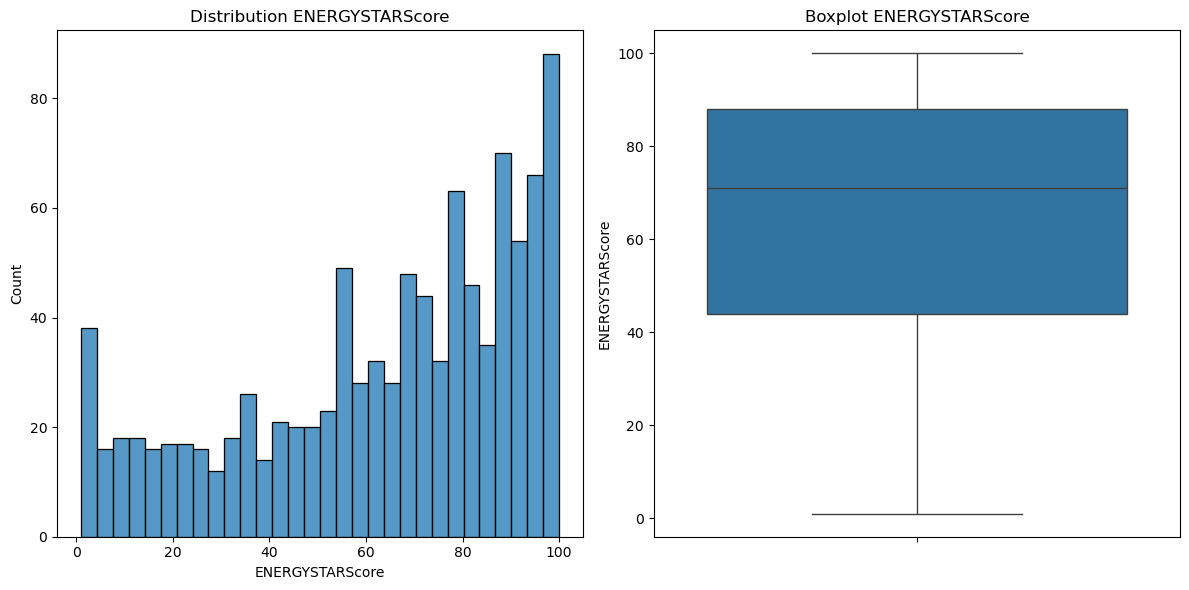

In [50]:
# Analyse de ENERGYSTARScore
print("Distribution de l'ENERGYSTARScore selon PrimaryPropertyType:")
score_by_type = clean_df.groupby('PrimaryPropertyType')['ENERGYSTARScore'].agg(['mean', 'count', 'std'])
print(score_by_type.sort_values('count', ascending=False))

# Visualisation de la distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=clean_df, x='ENERGYSTARScore', bins=30)
plt.title('Distribution ENERGYSTARScore')

plt.subplot(1, 2, 2)
sns.boxplot(data=clean_df, y='ENERGYSTARScore')
plt.title('Boxplot ENERGYSTARScore')
plt.tight_layout()
plt.show()

In [51]:
# Vérifie les lignes avec 0 bâtiments
print("Entrées avec 0 bâtiments :")
print(clean_df[clean_df['NumberofBuildings'] == 0][['PrimaryPropertyType', 'PropertyGFATotal', 'NumberofFloors']])

# Statistiques sur NumberofBuildings
print("\nStatistiques sur NumberofBuildings :")
print(clean_df['NumberofBuildings'].describe())

Entrées avec 0 bâtiments :
              PrimaryPropertyType  PropertyGFATotal  NumberofFloors
63                 Medical Office            179014               3
76    Small- and Mid-Sized Office             66240               2
160                     Warehouse             79600               4
201                  Large Office            100734               3
241   Small- and Mid-Sized Office             99005               5
...                           ...               ...             ...
3121                 Retail Store             45743               3
3155                        Other             21400               1
3205                   Laboratory            339591               8
3232                        Other             29000               1
3259  Small- and Mid-Sized Office             64820               2

[52 rows x 3 columns]

Statistiques sur NumberofBuildings :
count    1537.000000
mean        1.177619
std         3.048492
min         0.000000
25%         

In [52]:
# Remplacer les 0 par 1 dans NumberofBuildings car il est impossible d'avoir un emplacement sans bati, la médiane est 1 et 75% des valeurs sont 1 (Q1=Q2=Q3=1)
clean_df['NumberofBuildings'] = clean_df['NumberofBuildings'].replace(0, 1)

# Vérification après correction
print("Statistiques après correction :")
print(clean_df['NumberofBuildings'].describe())

Statistiques après correction :
count    1537.000000
mean        1.211451
std         3.040769
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64


#### ANOVA et Kruskal-Wallis

In [53]:
# Test de normalité - Variables à analyser
categorical_vars = ['PrimaryPropertyType', 'Neighborhood', 'ZipCode']
target_vars = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']

# Pour chaque combinaison de variable catégorielle et cible
for cat_var in categorical_vars:
    for target in target_vars:
        print(f"\n=== Test de normalité pour {target} groupé par {cat_var} ===")
        # Obtenir les catégories uniques
        categories = clean_df[cat_var].unique()
        # Si trop de catégories, n'en prendre que les 3 plus fréquentes
        if len(categories) > 3:
            top_categories = clean_df[cat_var].value_counts().head(3).index.tolist()
        else:
            top_categories = categories
        # Pour stocker les résultats des tests
        p_values = []
        # Pour chaque catégorie, vérifier la normalité
        for i, category in enumerate(top_categories):
            subset = clean_df[clean_df[cat_var] == category][target].dropna()
            if len(subset) > 5: # Besoin d'un minimum de données
                # Test de Shapiro-Wilk pour la normalité
                stat, p_value = stats.shapiro(subset)
                p_values.append((category, p_value, len(subset)))
        
        # Afficher les résultats des tests de normalité
        for category, p_value, count in p_values:
            if p_value < 0.05:
                print(f"{cat_var}={category} (n={count}): Distribution non normale (p={p_value:.4f})")
            else:
                print(f"{cat_var}={category} (n={count}): Distribution normale (p={p_value:.4f})")
        print("\n")


=== Test de normalité pour TotalGHGEmissions groupé par PrimaryPropertyType ===
PrimaryPropertyType=Small- and Mid-Sized Office (n=286): Distribution non normale (p=0.0000)
PrimaryPropertyType=Other (n=245): Distribution non normale (p=0.0000)
PrimaryPropertyType=Warehouse (n=185): Distribution non normale (p=0.0000)



=== Test de normalité pour SiteEnergyUse(kBtu) groupé par PrimaryPropertyType ===
PrimaryPropertyType=Small- and Mid-Sized Office (n=286): Distribution non normale (p=0.0000)
PrimaryPropertyType=Other (n=245): Distribution non normale (p=0.0000)
PrimaryPropertyType=Warehouse (n=185): Distribution non normale (p=0.0000)



=== Test de normalité pour TotalGHGEmissions groupé par Neighborhood ===
Neighborhood=DOWNTOWN (n=347): Distribution non normale (p=0.0000)
Neighborhood=GREATER DUWAMISH (n=328): Distribution non normale (p=0.0000)
Neighborhood=MAGNOLIA / QUEEN ANNE (n=143): Distribution non normale (p=0.0000)



=== Test de normalité pour SiteEnergyUse(kBtu) groupé p

In [54]:
from scipy.stats import kruskal

# Variables à analyser
categorical_vars = ['PrimaryPropertyType', 'Neighborhood', 'ZipCode']
target_vars = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']

# Créer un DataFrame pour stocker les résultats
results = []

# Pour chaque combinaison de variable catégorielle et cible
for cat_var in categorical_vars:
    for target in target_vars:
        print(f"\n=== Test de Kruskal-Wallis pour {target} groupé par {cat_var} ===")
        
        # Récupérer les données par catégorie
        categories = clean_df[cat_var].unique()
        
        # Collecter les données de chaque groupe
        groups = []
        group_names = []
        
        for category in categories:
            data = clean_df[clean_df[cat_var] == category][target].dropna().values
            if len(data) >= 5:  # Assurer suffisamment de données
                groups.append(data)
                group_names.append(category)
        
        if len(groups) >= 2:  # Au moins 2 groupes nécessaires pour le test
            try:
                # Effectuer le test de Kruskal-Wallis
                stat, p_value = kruskal(*groups)
                
                # Calculer le H ajusté / (n-1) comme approximation d'Eta²
                # Calculer N total
                n_total = sum(len(group) for group in groups)
                
                # Calculer une approximation d'Eta² (effet de taille)
                # Formule: (H - k + 1) / (n - k), où H est la statistique, k le nombre de groupes, n le nombre total d'observations
                k = len(groups)
                eta_squared = (stat - k + 1) / (n_total - k) if n_total > k else np.nan
                
                # Stocker les résultats
                results.append({
                    'Variable': cat_var,
                    'Target': target,
                    'Statistic': stat,
                    'p-value': p_value,
                    'Eta²': eta_squared,
                    'Nb_groupes': len(groups)
                })
                
                print(f"Statistique H = {stat:.4f}")
                print(f"p-value = {p_value:.10f}")
                print(f"Eta² (approximation) = {eta_squared:.4f}")
                print(f"Nombre de groupes valides: {len(groups)}")
                
                # Interprétation du résultat
                if p_value < 0.05:
                    print("Résultat: Il existe une différence significative entre au moins deux groupes.")
                else:
                    print("Résultat: Pas de différence significative détectée entre les groupes.")
                    
            except Exception as e:
                print(f"Erreur lors du test: {e}")
        else:
            print(f"Pas assez de groupes avec suffisamment de données pour {cat_var}")

# Convertir les résultats en DataFrame pour une meilleure visualisation
results_df = pd.DataFrame(results)

# Trier par p-value (du plus significatif au moins significatif)
if not results_df.empty:
    results_sorted = results_df.sort_values('p-value')
    print("\n=== Résumé des tests de Kruskal-Wallis ===")
    print(results_sorted)


=== Test de Kruskal-Wallis pour TotalGHGEmissions groupé par PrimaryPropertyType ===
Statistique H = 498.1818
p-value = 0.0000000000
Eta² (approximation) = 0.3159
Nombre de groupes valides: 20
Résultat: Il existe une différence significative entre au moins deux groupes.

=== Test de Kruskal-Wallis pour SiteEnergyUse(kBtu) groupé par PrimaryPropertyType ===
Statistique H = 649.0324
p-value = 0.0000000000
Eta² (approximation) = 0.4153
Nombre de groupes valides: 20
Résultat: Il existe une différence significative entre au moins deux groupes.

=== Test de Kruskal-Wallis pour TotalGHGEmissions groupé par Neighborhood ===
Statistique H = 87.4800
p-value = 0.0000000000
Eta² (approximation) = 0.0495
Nombre de groupes valides: 13
Résultat: Il existe une différence significative entre au moins deux groupes.

=== Test de Kruskal-Wallis pour SiteEnergyUse(kBtu) groupé par Neighborhood ===
Statistique H = 144.3525
p-value = 0.0000000000
Eta² (approximation) = 0.0868
Nombre de groupes valides: 13
R

PrimaryPropertyType:
- Pour les deux variables cibles, cette catégorie montre l'effet le plus fort (Eta² de 0.42 pour SiteEnergyUse et 0.32 pour TotalGHGEmissions)
- Les p-values sont extrêmement faibles (pratiquement zéro)
- Le type de propriété est un facteur très important pour prédire tant la consommation d'énergie que les émissions de GES


ZipCode:
- Le test de Kruskal-Wallis montre que ZipCode est statistiquement significatif
- L'Eta² est modéré (0.129 pour SiteEnergyUse et 0.093 pour TotalGHGEmissions)
- L'emplacement géographique a un impact sur la consommation et les émissions


Neighborhood:
- Également significatif, mais avec un effet plus faible que ZipCode (Eta² de 0.09 et 0.05)
- L'effet est plus prononcé pour la consommation d'énergie que pour les émissions

In [55]:
# Supprimer les colonnes OSEBuildingID et ZipCode
clean_df = clean_df.drop(['OSEBuildingID'], axis=1)
print("Colonnes restantes:")
print(clean_df.columns.tolist())

Colonnes restantes:
['PrimaryPropertyType', 'ZipCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions']


#### Encodage

In [56]:
from sklearn.model_selection import KFold

# Fonction pour l'encodage par moyenne de la cible avec validation croisée k-fold
def k_fold_target_encoding(df, categorical_col, target_col, n_folds=5, min_samples=10):
    """
    Encode une variable catégorielle par la moyenne de la variable cible
    en utilisant une validation croisée k-fold pour éviter la fuite de données.
    """
    # Créer une copie du DataFrame pour éviter de modifier l'original
    df_copy = df.copy()
    
    # Calculer la moyenne globale (pour les catégories rares)
    global_mean = df[target_col].mean()
    
    # Créer une colonne pour stocker l'encodage
    encoding_col_name = f"{categorical_col}_{target_col}_encoded"
    df_copy[encoding_col_name] = float('nan')
    
    # Définir les k folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Pour chaque fold
    for train_idx, val_idx in kf.split(df):
        # Calculer les moyennes sur le fold d'entraînement
        encoding_dict = {}
        
        # Calculer les statistiques par catégorie sur les données d'entraînement
        train_stats = df.iloc[train_idx].groupby(categorical_col, observed=False)[target_col].agg(['mean', 'count'])
        
        # Créer le dictionnaire d'encodage
        for category, stats in train_stats.iterrows():
            if stats['count'] >= min_samples:
                encoding_dict[category] = stats['mean']
            else:
                encoding_dict[category] = global_mean
        
        # Appliquer l'encodage au fold de validation
        val_categories = df.iloc[val_idx][categorical_col]
        for i, idx in enumerate(val_idx):
            category = df.iloc[idx][categorical_col]
            df_copy.loc[idx, encoding_col_name] = encoding_dict.get(category, global_mean)
    
    # Pour les nouvelles catégories ou les valeurs manquantes, utiliser la moyenne globale
    df_copy[encoding_col_name] = df_copy[encoding_col_name].fillna(global_mean)

    return df_copy[encoding_col_name]

# Fonction pour encoder plusieurs variables catégorielles
def encode_categorical_variables(df, cat_vars, target_vars):
    """
    Encode plusieurs variables catégorielles en utilisant le k-fold Target Encoding
    pour chaque variable cible spécifiée.
    """
    # Créer une copie du DataFrame pour éviter de modifier l'original
    encoded_df = df.copy()
    
    # Pour chaque combinaison de variable catégorielle et cible
    for cat_var in cat_vars:
        for target in target_vars:
            # Créer un nom pour la nouvelle colonne
            encoded_col_name = f"{cat_var}_{target}_encoded"
            
            # Encoder la variable et l'ajouter au DataFrame
            encoded_df[encoded_col_name] = k_fold_target_encoding(df, cat_var, target)
            print(f"Variable '{cat_var}' encodée pour la cible '{target}' -> '{encoded_col_name}'")
    
    return encoded_df

# Variables à encoder
cat_vars = ['PrimaryPropertyType', 'Neighborhood', 'ZipCode']
target_vars = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']

# Appliquer l'encodage
encoded_df = encode_categorical_variables(clean_df, cat_vars, target_vars)

# Afficher les premières lignes du DataFrame encodé
print("\nAperçu du DataFrame encodé:")
print(encoded_df.head())

# Afficher les statistiques des nouvelles colonnes encodées
print("\nStatistiques des colonnes encodées:")
encoded_cols = [col for col in encoded_df.columns if col.endswith('_encoded')]
print(encoded_df[encoded_cols].describe())

Variable 'PrimaryPropertyType' encodée pour la cible 'TotalGHGEmissions' -> 'PrimaryPropertyType_TotalGHGEmissions_encoded'
Variable 'PrimaryPropertyType' encodée pour la cible 'SiteEnergyUse(kBtu)' -> 'PrimaryPropertyType_SiteEnergyUse(kBtu)_encoded'
Variable 'Neighborhood' encodée pour la cible 'TotalGHGEmissions' -> 'Neighborhood_TotalGHGEmissions_encoded'
Variable 'Neighborhood' encodée pour la cible 'SiteEnergyUse(kBtu)' -> 'Neighborhood_SiteEnergyUse(kBtu)_encoded'
Variable 'ZipCode' encodée pour la cible 'TotalGHGEmissions' -> 'ZipCode_TotalGHGEmissions_encoded'
Variable 'ZipCode' encodée pour la cible 'SiteEnergyUse(kBtu)' -> 'ZipCode_SiteEnergyUse(kBtu)_encoded'

Aperçu du DataFrame encodé:
  PrimaryPropertyType  ZipCode Neighborhood  Latitude  Longitude  YearBuilt  \
0               Hotel  98101.0     DOWNTOWN  47.61220 -122.33799       1927   
1               Hotel  98101.0     DOWNTOWN  47.61317 -122.33393       1996   
2               Hotel  98101.0     DOWNTOWN  47.61393 

In [57]:
# Supprimer les colonnes catégorielles originales
columns_to_drop = ['PrimaryPropertyType', 'Neighborhood', 'ZipCode']
model_df = encoded_df.drop(columns=columns_to_drop)

In [58]:
# Calculer la matrice de corrélation des features encodées
correlation_matrix = encoded_df[encoded_cols].corr()
print(correlation_matrix)

                                                 PrimaryPropertyType_TotalGHGEmissions_encoded  \
PrimaryPropertyType_TotalGHGEmissions_encoded                                         1.000000   
PrimaryPropertyType_SiteEnergyUse(kBtu)_encoded                                       0.879910   
Neighborhood_TotalGHGEmissions_encoded                                                0.126043   
Neighborhood_SiteEnergyUse(kBtu)_encoded                                              0.167865   
ZipCode_TotalGHGEmissions_encoded                                                     0.104777   
ZipCode_SiteEnergyUse(kBtu)_encoded                                                   0.153194   

                                                 PrimaryPropertyType_SiteEnergyUse(kBtu)_encoded  \
PrimaryPropertyType_TotalGHGEmissions_encoded                                           0.879910   
PrimaryPropertyType_SiteEnergyUse(kBtu)_encoded                                         1.000000   
Neighborhood_

### Synthèse avant feature engineering

In [59]:
# Vue d'ensemble du dataset final
print("Dimensions finales du dataset :")
print(model_df.shape)

Dimensions finales du dataset :
(1537, 21)


In [60]:
# Liste simple des colonnes
print("Liste des colonnes :")
print(model_df.columns.tolist())

# Vue plus détaillée avec types de données
print("\nInformations détaillées sur les colonnes :")
print(model_df.info())

# Description statistique des variables numériques
print("\nStatistiques descriptives :")
print(model_df.describe())

Liste des colonnes :
['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'PrimaryPropertyType_TotalGHGEmissions_encoded', 'PrimaryPropertyType_SiteEnergyUse(kBtu)_encoded', 'Neighborhood_TotalGHGEmissions_encoded', 'Neighborhood_SiteEnergyUse(kBtu)_encoded', 'ZipCode_TotalGHGEmissions_encoded', 'ZipCode_SiteEnergyUse(kBtu)_encoded']

Informations détaillées sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
Index: 1537 entries, 0 to 3375
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Latitude                                         1537 non-null   float64
 1   Longitude                                   

- Structure globale :
    - 1537 bâtiments
    - 21 variables

- Variables cibles :
    - SiteEnergyUse(kBtu) : grande dispersion
    - TotalGHGEmissions : une valeur négative (-0.8) à conserver (Bullitt Center)

- Features numériques (13) :
    - Latitude
    - Longitude
    - YearBuilt
    - NumberofBuildings
    - NumberofFloors
    - PropertyGFATotal
    - PropertyGFAParking
    - PropertyGFABuilding(s)
    - ENERGYSTARScore (35% de NaN)
    - SiteEUI(kBtu/sf)
    - SteamUse(kBtu) 
    - Electricity(kBtu)
    - NaturalGas(kBtu)


- Features catégorielles (6) :
    - Neighborhood-encoded (2)
    - PrimaryPropertyType-encoded (2)
    - ZipCode-encoded(2)

# feature engineering

In [61]:
# Création des nouvelles features

# Features de Surface - Objectif : Capturer l'efficacité du bâtiment
def create_surface_features(df):
   # Surface moyenne par étage (indication de l'étalement vertical du bâtiment)
   df['surface_per_floor'] = df['PropertyGFABuilding(s)'] / (df['NumberofFloors'] + 1)
   
   # Ratio parking/surface totale (impact des espaces de stationnement)
   df['parking_ratio'] = df['PropertyGFAParking'] / df['PropertyGFATotal']
   
   # Surface moyenne par bâtiment (mesure de la taille des unités)
   df['building_density'] = df['PropertyGFATotal'] / df['NumberofBuildings']
   
   # Efficacité par étage et bâtiment (optimisation de l'espace) sans divisions par zéro
   df['floor_efficiency'] = df.apply(lambda x: x['PropertyGFATotal'] / ((x['NumberofFloors'] + 1) * x['NumberofBuildings']), axis=1)
   
   return df

# Features Énergétiques - Objectif : Analyser la répartition et l'efficacité énergétique
def create_energy_features(df):
   # Mix énergétique (proportion électricité vs total) sans divisions par zéro
   total_energy = df['Electricity(kBtu)'] + df['NaturalGas(kBtu)'] +  df['SteamUse(kBtu)']
   df['electricity_energy_mix_score'] = df['Electricity(kBtu)'] / total_energy.replace(0, np.nan)
   df['naturalgas_energy_mix_score'] = df['NaturalGas(kBtu)'] / total_energy.replace(0, np.nan)
   df['steamuse_energy_mix_score'] = df['SteamUse(kBtu)'] / total_energy.replace(0, np.nan)
   return df
    
def create_buildingage_features(df):
    df['BuildingAge'] = 2025 - df['YearBuilt']
    return df

# Application de toutes les transformations
def create_all_features(df):
   df = create_surface_features(df)
   df = create_energy_features(df)
   df = create_buildingage_features(df)
   return df

# Création des nouvelles features
model_df = create_all_features(model_df)

# Vérification des nouvelles colonnes
print("\nNombre total de features :", len(model_df.columns))


Nombre total de features : 29


In [62]:
# Vérification des valeurs nulles et infinies
new_features=['surface_per_floor','parking_ratio','building_density','floor_efficiency',
              'electricity_energy_mix_score','naturalgas_energy_mix_score','steamuse_energy_mix_score',
             ]

print("Vérification des valeurs nulles et infinies :")
for feature in new_features:
    nulls = model_df[feature].isnull().sum()
    infs = np.isinf(model_df[feature]).sum()
    if nulls > 0 or infs > 0:
        print(f"{feature}: {nulls} nulls, {infs} infinies")

# Statistiques descriptives
print("\nStatistiques descriptives des nouvelles features :")
print(model_df[new_features].describe())

Vérification des valeurs nulles et infinies :
electricity_energy_mix_score: 1 nulls, 0 infinies
naturalgas_energy_mix_score: 1 nulls, 0 infinies
steamuse_energy_mix_score: 1 nulls, 0 infinies

Statistiques descriptives des nouvelles features :
       surface_per_floor  parking_ratio  building_density  floor_efficiency  \
count       1.537000e+03    1537.000000      1.537000e+03       1537.000000   
mean        2.892313e+04       0.065018      1.088930e+05      22943.564239   
std         2.423747e+05       0.144053      1.869210e+05      47365.244303   
min         2.194800e+02       0.000000      4.300000e+03        219.480000   
25%         8.851000e+03       0.000000      2.830900e+04       9260.466667   
50%         1.331767e+04       0.000000      4.671000e+04      13960.000000   
75%         2.156033e+04       0.000000      1.022350e+05      23097.100000   
max         9.320156e+06       0.895023      2.200000e+06     947987.000000   

       electricity_energy_mix_score  natural

In [63]:
lignes_avec_valeurs_manquantes = model_df[model_df['electricity_energy_mix_score'].isnull()]
print(lignes_avec_valeurs_manquantes)

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
513  47.63718 -122.37734       2008                1.0               1   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
513             57176                   0                   57176   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
513             31.0        208.800003           12525174.0             0.0   

     Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
513                0.0               0.0                0.0   

     PrimaryPropertyType_TotalGHGEmissions_encoded  \
513                                     199.832426   

     PrimaryPropertyType_SiteEnergyUse(kBtu)_encoded  \
513                                     1.698817e+07   

     Neighborhood_TotalGHGEmissions_encoded  \
513                              214.901701   

     Neighborhood_SiteEnergyUse(kBtu)_encoded  \
513                              1.128596e+07   

     ZipCo

In [64]:
# Dictionnaire avec les valeurs de remplacement pour chaque colonne
valeurs_remplacement = {
    'electricity_energy_mix_score': 0.71,  # valeur mmédiale
    'naturalgas_energy_mix_score': 0.29,
    'steamuse_energy_mix_score': 0
}

model_df.loc[513, valeurs_remplacement.keys()] = model_df.loc[513, valeurs_remplacement.keys()].fillna(value=valeurs_remplacement).infer_objects(copy=False)
print(model_df.loc[513])


Latitude                                           4.763718e+01
Longitude                                         -1.223773e+02
YearBuilt                                          2.008000e+03
NumberofBuildings                                  1.000000e+00
NumberofFloors                                     1.000000e+00
PropertyGFATotal                                   5.717600e+04
PropertyGFAParking                                 0.000000e+00
PropertyGFABuilding(s)                             5.717600e+04
ENERGYSTARScore                                    3.100000e+01
SiteEUI(kBtu/sf)                                   2.088000e+02
SiteEnergyUse(kBtu)                                1.252517e+07
SteamUse(kBtu)                                     0.000000e+00
Electricity(kBtu)                                  0.000000e+00
NaturalGas(kBtu)                                   0.000000e+00
TotalGHGEmissions                                  0.000000e+00
PrimaryPropertyType_TotalGHGEmissions_en

In [65]:
print("Liste des colonnes :")
print(model_df.columns.tolist())

Liste des colonnes :
['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'PrimaryPropertyType_TotalGHGEmissions_encoded', 'PrimaryPropertyType_SiteEnergyUse(kBtu)_encoded', 'Neighborhood_TotalGHGEmissions_encoded', 'Neighborhood_SiteEnergyUse(kBtu)_encoded', 'ZipCode_TotalGHGEmissions_encoded', 'ZipCode_SiteEnergyUse(kBtu)_encoded', 'surface_per_floor', 'parking_ratio', 'building_density', 'floor_efficiency', 'electricity_energy_mix_score', 'naturalgas_energy_mix_score', 'steamuse_energy_mix_score', 'BuildingAge']


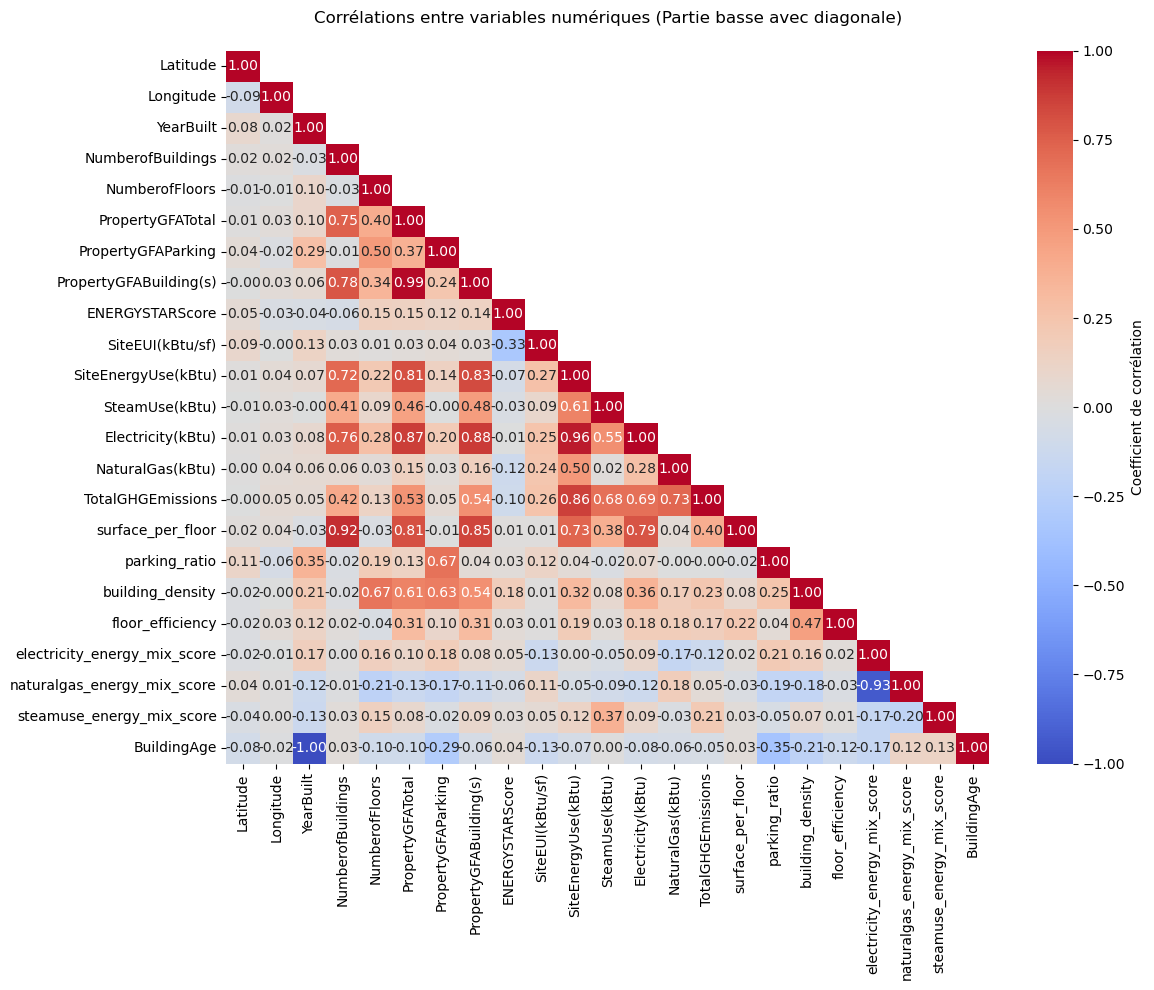

In [66]:
plt.style.use('default')

def plot_lower_triangle_correlations(df):
    # Variables numériques
    numeric_vars = [
        'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 
        'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 
        'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
        'surface_per_floor', 'parking_ratio', 'building_density', 'floor_efficiency', 'electricity_energy_mix_score',
        'naturalgas_energy_mix_score', 'steamuse_energy_mix_score', 'BuildingAge'
    ]
    
    # Calcul de la matrice de corrélation
    correlation_matrix = df[numeric_vars].corr()
    
    # Création d'un masque pour masquer uniquement la partie supérieure (sans la diagonale)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

    # Création de la figure
    plt.figure(figsize=(12, 10))  

    # Création de la heatmap avec le masque
    sns.heatmap(
        correlation_matrix, 
        mask=mask,         # Application du masque
        annot=True,        # Affiche les valeurs
        cmap='coolwarm',   # Rouge pour positif, bleu pour négatif
        center=0,          # Centre la colormap sur 0
        fmt='.2f',         # Format à 2 décimales
        cbar_kws={'label': 'Coefficient de corrélation'}  # Label de la barre de couleur
    )
    
    # Personnalisation du graphique
    plt.title('Corrélations entre variables numériques (Partie basse avec diagonale)', pad=20)
    plt.tight_layout()
    
    # Affichage
    plt.show()

# Appel de la fonction
plot_lower_triangle_correlations(model_df)

In [67]:
#variables redondantes
columns_to_drop = [
    'floor_efficiency','parking_ratio','SiteEUI(kBtu/sf)', 'NumberofBuildings','surface_per_floor','YearBuilt',
    'NumberofFloors','PropertyGFATotal','Electricity(kBtu)', 'NaturalGas(kBtu)','naturalgas_energy_mix_score',
    'SteamUse(kBtu)', 'PropertyGFAParking'
]
model_df = model_df.drop(columns=columns_to_drop)

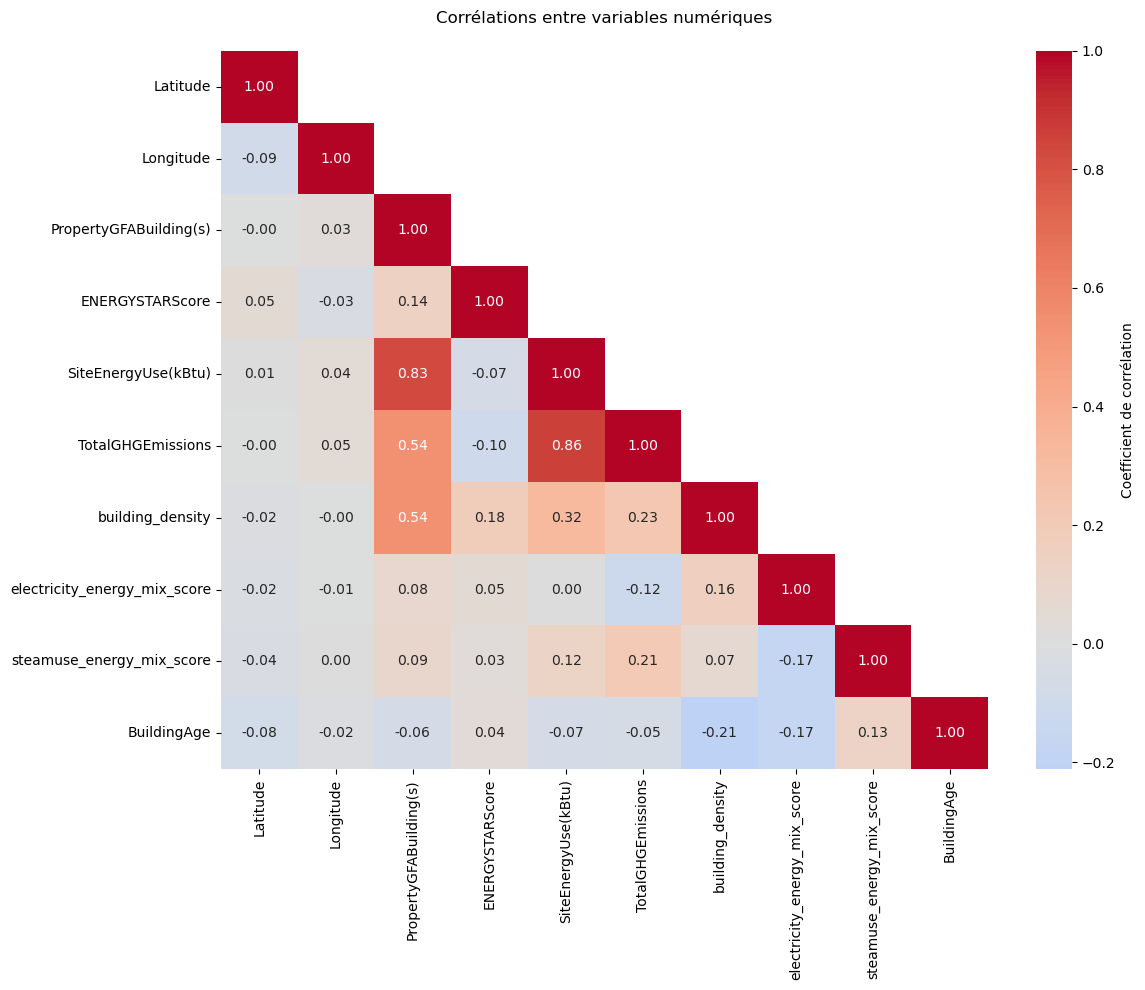

In [68]:
plt.style.use('default')

def plot_lower_triangle_correlations(df):
    # Variables numériques
    numeric_vars = [
        'Latitude', 'Longitude', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
        'TotalGHGEmissions', 'building_density', 'electricity_energy_mix_score', 'steamuse_energy_mix_score', 'BuildingAge'
    ]
    
    # Calcul de la matrice de corrélation
    correlation_matrix = df[numeric_vars].corr()
    
    # Création d'un masque pour masquer uniquement la partie supérieure (sans la diagonale)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

    # Création de la figure
    plt.figure(figsize=(12, 10))  

    # Création de la heatmap avec le masque
    sns.heatmap(
        correlation_matrix, 
        mask=mask,         # Application du masque
        annot=True,        # Affiche les valeurs
        cmap='coolwarm',   # Rouge pour positif, bleu pour négatif
        center=0,          # Centre la colormap sur 0
        fmt='.2f',         # Format à 2 décimales
        cbar_kws={'label': 'Coefficient de corrélation'}  # Label de la barre de couleur
    )
    
    # Personnalisation du graphique
    plt.title('Corrélations entre variables numériques', pad=20)
    plt.tight_layout()
    
    # Affichage
    plt.show()

# Appel de la fonction
plot_lower_triangle_correlations(model_df)

In [69]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537 entries, 0 to 3375
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Latitude                                         1537 non-null   float64
 1   Longitude                                        1537 non-null   float64
 2   PropertyGFABuilding(s)                           1537 non-null   int64  
 3   ENERGYSTARScore                                  993 non-null    float64
 4   SiteEnergyUse(kBtu)                              1537 non-null   float64
 5   TotalGHGEmissions                                1537 non-null   float64
 6   PrimaryPropertyType_TotalGHGEmissions_encoded    1537 non-null   float64
 7   PrimaryPropertyType_SiteEnergyUse(kBtu)_encoded  1537 non-null   float64
 8   Neighborhood_TotalGHGEmissions_encoded           1537 non-null   float64
 9   Neighborhood_SiteEnergyUse(kBtu)_en

- Structure globale :
    - 1537 bâtiments
    - 16 variables


- Variables cibles (2):
    - SiteEnergyUse(kBtu)
    - TotalGHGEmissions


- Features numériques (8) :
    - Latitude
    - Longitude
    - BuildingAge
    - PropertyGFABuilding(s)
    - electricity_energy_mix_score
    - steamuse_energy_mix_score
    - ENERGYSTARScore (35% de NaN)
    - building_density


- Features catégorielles (6) :
    - Neighborhood (2)
    - PropertyType(2)
    - ZipCode (2)

In [70]:
# Sauvegarde du DataFrame dans un nouveau fichier CSV
model_df.to_csv('data_step1.csv', index=False)

### Graphiques complémentaires créés pour la présentation

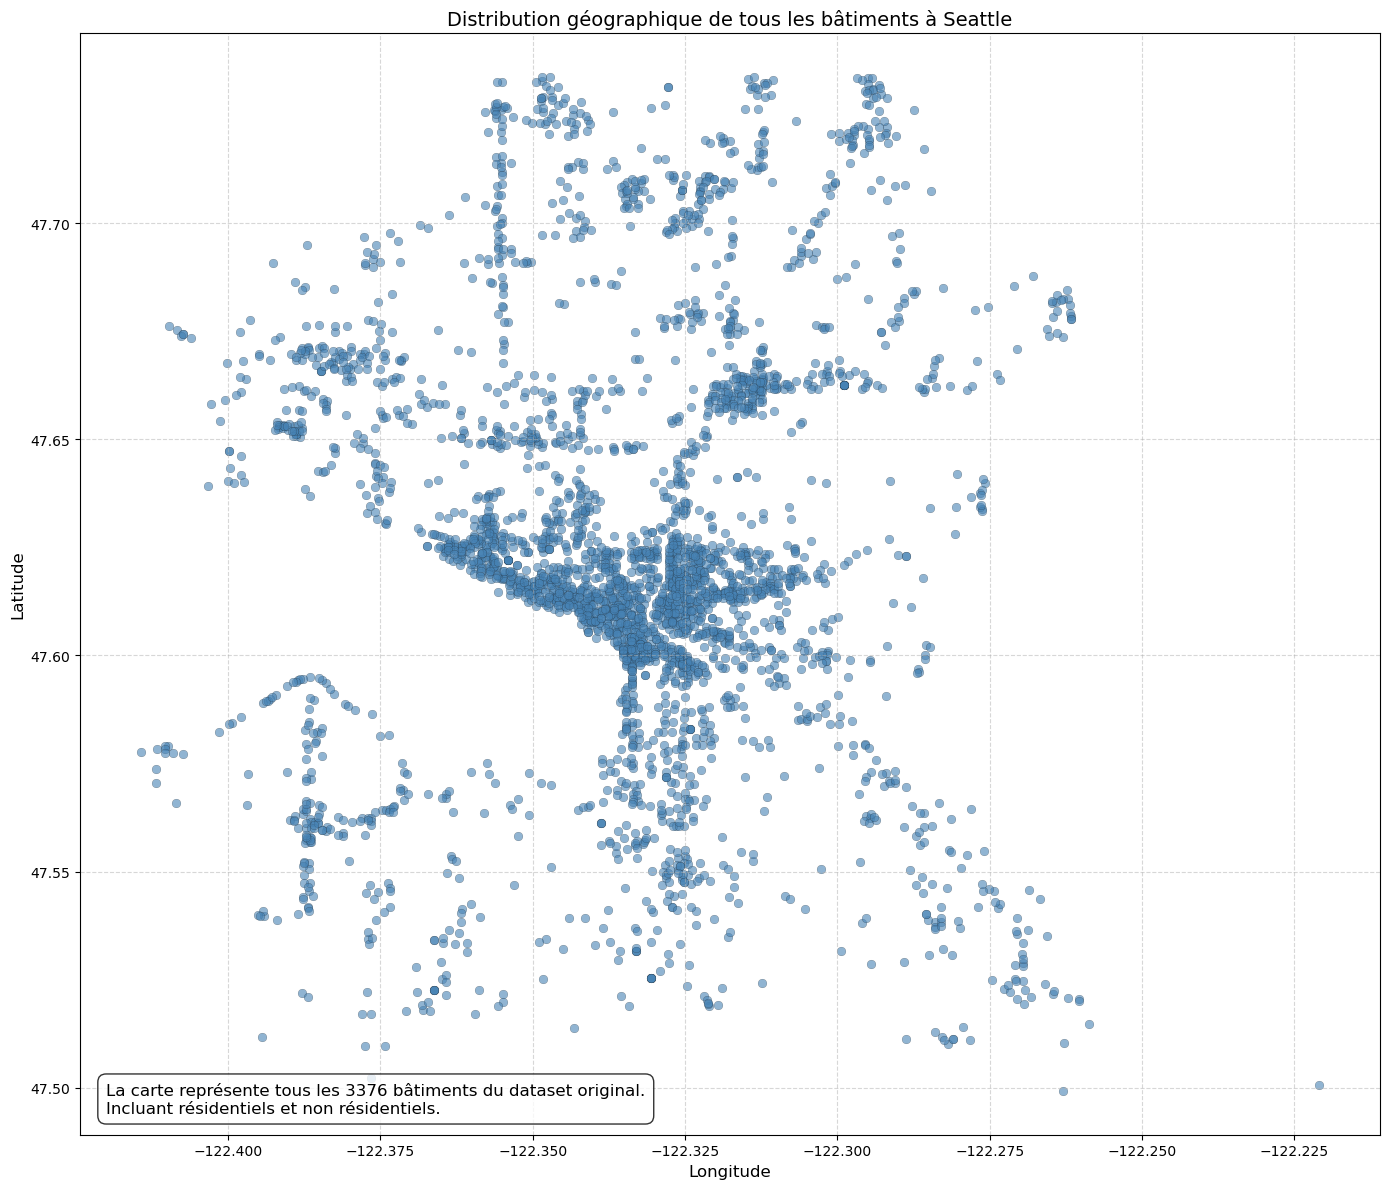

In [71]:
# Créer une carte montrant tous les bâtiments de Seattle
def create_full_building_map(df):
    plt.figure(figsize=(14, 12))
    
    # Tracer tous les bâtiments en une seule couleur
    plt.scatter(df['Longitude'], 
                df['Latitude'],
                c='steelblue', alpha=0.6, s=40, edgecolor='k', linewidth=0.2)
    
    # Ajouter des titres et labels
    plt.title('Distribution géographique de tous les bâtiments à Seattle', fontsize=14)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    
    # Afficher le nombre total de bâtiments
    total_buildings = len(df)
    
    # Ajouter une annotation pour expliquer la carte
    plt.annotate(f'La carte représente tous les {total_buildings} bâtiments du dataset original.\n'
                 'Incluant résidentiels et non résidentiels.', 
                 xy=(0.02, 0.02), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))
    
    # Améliorer le style
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Ajuster les limites pour se concentrer sur Seattle
    plt.xlim(df['Longitude'].min() - 0.01, df['Longitude'].max() + 0.01)
    plt.ylim(df['Latitude'].min() - 0.01, df['Latitude'].max() + 0.01)
    
    plt.tight_layout()
    plt.savefig('all_buildings_map.png', dpi=300, bbox_inches='tight')
    plt.show()

# Utilisation:
create_full_building_map(df)

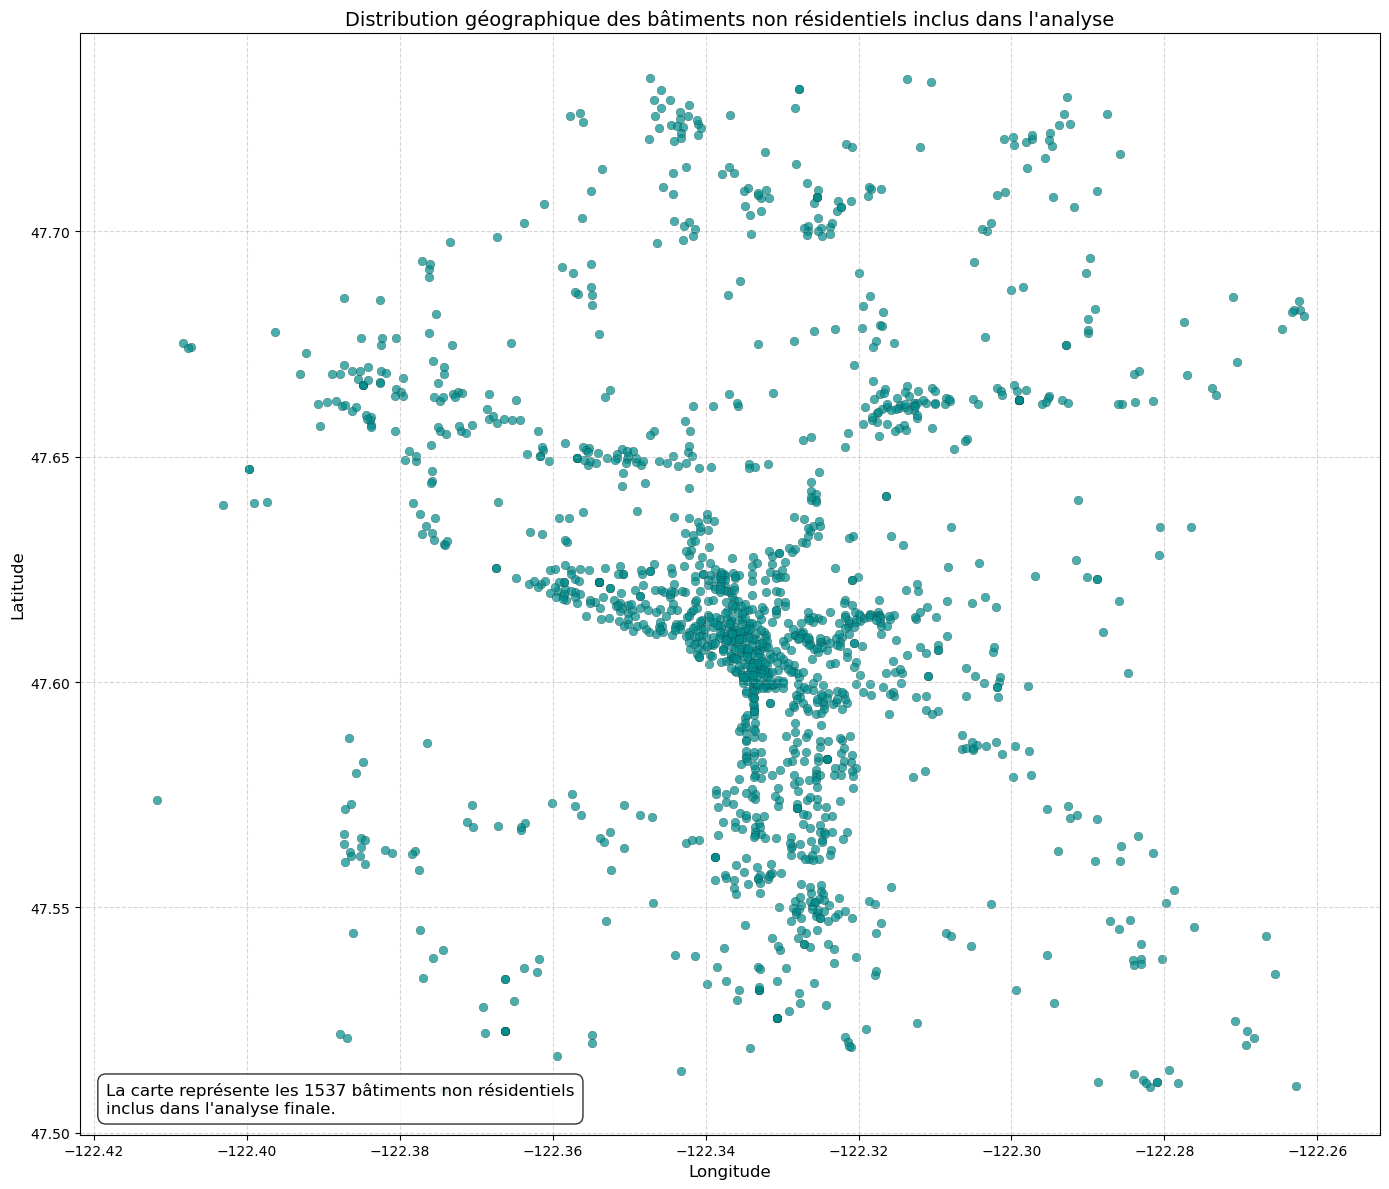

In [72]:
# Créer une carte montrant uniquement les bâtiments inclus dans l'analyse finale
def create_included_building_map(model_df):
    plt.figure(figsize=(14, 12))
    
    # Tracer tous les bâtiments inclus en une seule couleur
    plt.scatter(model_df['Longitude'], 
                model_df['Latitude'],
                c='darkcyan', alpha=0.7, s=40, edgecolor='k', linewidth=0.2)
    
    # Ajouter des titres et labels
    plt.title('Distribution géographique des bâtiments non résidentiels inclus dans l\'analyse', fontsize=14)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    
    # Afficher le nombre total de bâtiments
    total_buildings = len(model_df)
    
    # Ajouter une annotation pour expliquer la carte
    plt.annotate(f'La carte représente les {total_buildings} bâtiments non résidentiels\n'
                 'inclus dans l\'analyse finale.', 
                 xy=(0.02, 0.02), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))
    
    # Améliorer le style
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Ajuster les limites pour se concentrer sur Seattle
    plt.xlim(model_df['Longitude'].min() - 0.01, model_df['Longitude'].max() + 0.01)
    plt.ylim(model_df['Latitude'].min() - 0.01, model_df['Latitude'].max() + 0.01)
    
    plt.tight_layout()
    plt.savefig('included_buildings_map.png', dpi=300, bbox_inches='tight')
    plt.show()

# Utilisation:
create_included_building_map(model_df)